# ПРОЕКТ-3: предсказание рейтинга отеля

**ОПИСАНИЕ КЕЙСА (ПРОБЛЕМА):**
> Представьте, что вы работаете датасаентистом в компании Booking. Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов нахождения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель играет нечестно, и его стоит проверить.
>
> работать придется с датасетом, в котором содержатся сведения о 515 000 отзывов на отели Европы. Модель, которую необходимо будет обучать, должна предсказывать рейтинг отеля по данным сайта Booking на основе имеющихся в датасете данных. 

**ЦЕЛЬ:**
> построить модель на основе алгоритмов машинного обучения, которая предсказывает рейтинг отеля

**ЗАДАЧИ ПРОЕКТА:**
> ознакомиться с входными данными (датасет с информацией об отелях, обучающая и тестовая выборки);
> изучить пример машинного обучения (baseline, реализующий модель модель из класса RandomForestRegressor библиотеки scikit-learn);
> проверить эффективность предлагаемой модели, используя метрику MAPE;
> принять участие в соревнованиях на площадке kaggle.com.

**ОЦЕНКА КАЧЕСТВА МОДЕЛИ (Метрика качества):**
> Результаты оцениваются по метрике MAPE ## Файл представления Для каждого **id** отеля в наборе тестовых данных вы должны предсказать рейтинг отеля для **reviewer_score** переменной. Файл должен содержать заголовок и иметь следующий формат: ``` reviewer_score,id 1,1 ```

# **УСТАНОВКА БИБЛИОТЕК**

In [1]:
# установка библиотеки Статистика:
!pip install statistics

  Preparing metadata (setup.py) ... done
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7436 sha256=a9d068a9728112af426764b144bc8ab9d36fee1f3eada7a300b18c35e430fca3
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built statistics


In [2]:
!pip install geopy

In [3]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 15.0 MB/s eta 0:00:0000:0100:01m


In [4]:
!pip install nltk

# **ИМПОРТ НЕОБХОДИМЫХ БИБЛИОТЕК**

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import plotly.express as px #для визуализации
import plotly.graph_objects as go
import plotly.io as pio
import kaleido 

#для работы с статистикой:from scipy.stats import norm
from scipy import stats #работа с статистикой
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind, shapiro, f_oneway, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

import statistics as st

#для работы с архивами:
import zipfile
import io

#для работы с регулярными выражениями:
import re

#библиотека для анализа настроения отзывов
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#для вычисления координат
from geopy.distance import geodesic as GD
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

#для работы с кодировщиками признаков
import category_encoders as ce

#для работы с алгоритмами и моделями:
from sklearn import linear_model #линейные моделиё
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn.metrics import silhouette_score #оценка точности - метод силуэта
from sklearn import preprocessing #предобработка
from sklearn import model_selection #выбор модели
from sklearn import tree #модель дерева решений
from sklearn import cluster #кластеризация
from sklearn import feature_selection #отбор признаков
from sklearn.model_selection import train_test_split #сплитование выборки
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
from sklearn.feature_selection import chi2 # хи-квадрат
from sklearn.feature_selection import f_classif # anova

%matplotlib inline
plt.style.use('default')
#plt.style.use('seaborn')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# **ЗНАКОМСТВО С ИСХОДНЫМИ ДАННЫМИ**

In [7]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [8]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [9]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [10]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [12]:
df_train.head(2)

hotel_address  \
0  Stratton Street Mayfair Westminster Borough Lo...   
1  130 134 Southampton Row Camden London WC1B 5AF...   

   additional_number_of_scoring review_date  average_score  \
0                           581   2/19/2016            8.4   
1                           299   1/12/2017            8.3   

                        hotel_name reviewer_nationality  negative_review  \
0               The May Fair Hotel      United Kingdom          Leaving    
1  Mercure London Bloomsbury Hotel      United Kingdom    poor breakfast   

   review_total_negative_word_counts  total_number_of_reviews  \
0                                  3                     1994   
1                                  3                     1361   

       positive_review  review_total_positive_word_counts  \
0   Staff were amazing                                  4   
1             location                                  2   

   total_number_of_reviews_reviewer_has_given  reviewer_score  \
0                                           7            10.0   
1                                          14             6.3   

                                                tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Studio Suite ...           531 day   
1  [' Business trip ', ' Couple ', ' Standard Dou...           203 day   

         lat       lng  
0  51.507894 -0.143671  
1  51.521009 -0.123097

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [14]:
df_test.head(2)

hotel_address  \
0                 Via Senigallia 6 20161 Milan Italy   
1  Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...   

   additional_number_of_scoring review_date  average_score         hotel_name  \
0                           904   7/21/2017            8.1     Hotel Da Vinci   
1                           612  12/12/2016            8.6  Urban Lodge Hotel   

  reviewer_nationality                                    negative_review  \
0      United Kingdom    Would have appreciated a shop in the hotel th...   
1             Belgium         No tissue paper box was present at the room   

   review_total_negative_word_counts  total_number_of_reviews  \
0                                 52                    16670   
1                                 10                     5018   

                                     positive_review  \
0   Hotel was great clean friendly staff free bre...   
1                                        No Positive   

   review_total_positive_word_counts  \
0                                 62   
1                                  0   

   total_number_of_reviews_reviewer_has_given  \
0                                           1   
1                                           7   

                                                tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Double Room '...           13 days   
1  [' Leisure trip ', ' Group ', ' Triple Room ',...           234 day   

         lat       lng  
0  45.533137  9.171102  
1  52.385649  4.834443

In [15]:
sample_submission.head(2)

reviewer_score      id
0               1  488440
1              10  274649

In [16]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [17]:
# ВАЖНО! для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, поэтому пока просто заполняем нулями

data = pd.concat([df_train, df_test], sort=False, ignore_index=True)#.reset_index(drop=True) # объединяем

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

# **РЕЗЕРВНАЯ КОПИЯ ИСХОДНОГО ДАТАСЕТА**

In [19]:
data_saved = data.copy()

# **ОБУЧЕНИЕ-1 (v1)**

описание:
- признаки "долгота" и "широта" заполняются значение 0, если есть пропуски
- EDA не делается
- признаки с dtypes "object" - удаляются и не преобразовываются

In [ ]:
# формируем копию датасета и работаем с копией
df_v1 = data.copy()

In [ ]:
df_v1['lat'] = df_v1['lat'].fillna(0, inplace=False)
df_v1['lng'] = df_v1['lng'].fillna(0, inplace=False)

In [ ]:
df_v1.nunique(dropna=False)

In [ ]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df_v1.drop(['sample'], axis=1).corr(numeric_only=True), annot=True)

In [ ]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in df_v1.columns if df_v1[s].dtypes == 'object']
df_v1.drop(object_columns, axis = 1, inplace=True)

In [ ]:
df_v1.info()

In [ ]:
# Теперь выделим тестовую часть
train_data = df_v1.query('sample == 1').drop(['sample'], axis=1)
test_data = df_v1.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [ ]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

In [ ]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [ ]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred).round(7))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred).round(7))

In [ ]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

> Признаки "lat" и "lng" имеют нулевую значимость. Возможно, что они сами по себе бесполезны.

In [ ]:
test_data.sample(10)

In [ ]:
test_data = test_data.drop(['reviewer_score'], axis=1)

# **ОБУЧЕНИЕ-2 (v2)**

описание:
- признаки "долгота" и "широта" заполняются значение 0, если есть пропуски
- EDA не делается
- признаки с dtypes "object" - удаляются и не преобразовываются
- признаки "lat", "lng" - удаляются

In [ ]:
# формируем копию датасета и работаем с копией
df_v2 = data.copy()

In [ ]:
df_v2 = df_v2.drop('lat', axis=1) # Удаляем координаты
df_v2 = df_v2.drop('lng', axis=1)

In [ ]:
df_v2.nunique(dropna=False)

In [ ]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df_v2.drop(['sample'], axis=1).corr(numeric_only=True), annot=True)

In [ ]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in df_v2.columns if df_v2[s].dtypes == 'object']
df_v2.drop(object_columns, axis = 1, inplace=True)

In [ ]:
df_v2.info()

In [ ]:
# Теперь выделим тестовую часть
train_data = df_v2.query('sample == 1').drop(['sample'], axis=1)
test_data = df_v2.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [ ]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

In [ ]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [ ]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred).round(7))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred).round(7))

In [ ]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [ ]:
test_data = test_data.drop(['reviewer_score'], axis=1)

# **ОБУЧЕНИЕ-3 (v3)**

описание:
- признаки "долгота" и "широта" заполняются значение географическими координатами, если есть пропуски
- EDA делается и результаты визуализируются
- признаки с dtypes "object" - удаляются и некоторые из них преобразуются
- признаки с dtypes "float" и "int" - некоторые из них преобразуются

In [20]:
# формируем копию датасета и работаем с копией
df_v3 = data.copy()

In [21]:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

## 1. ОЧИСТКА ДАННЫХ

In [22]:
# количество пропусков в долготе и широте адресов отелей:
print(f"количество пропусков в адресах отелей: {df_v3.loc[df_v3['lat'].isnull(),'hotel_address'].unique().shape[0]}")

# проверка на совпадение объектов в датасете с пропусками в признаке "lat" и "lng":
a=set(df_v3[df_v3['lat'].isnull()].index)
b=set(df_v3[df_v3['lng'].isnull()].index)
print('пропуски присутствуют в одних и техже строках:', len(a-b))

# список адресов отелей, в координатах которых есть пропуски:
print('\nсписок адресов отелей с пропусками в координатах: ')
display(df_v3.loc[df_v3['lat'].isnull(), 'hotel_address'].value_counts())

# список отелей, в координатах адресов которых есть пропуски:
print('\nсписок отелей, адреса которых имеют пропуски в координатах: ')
df_v3.loc[df_v3['lat'].isnull(), 'hotel_name'].value_counts()

количество пропусков в адресах отелей: 17
пропуски присутствуют в одних и техже строках: 0

список адресов отелей с пропусками в координатах: 


hotel_address
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria    658
Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria            563
W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria       389
4 rue de la P pini re 8th arr 75008 Paris France               290
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria         245
W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria          223
Savoyenstra e 2 16 Ottakring 1160 Vienna Austria               194
Sieveringer Stra e 4 19 D bling 1190 Vienna Austria            147
Bail n 4 6 Eixample 08010 Barcelona Spain                      146
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria             93
Hasenauerstra e 12 19 D bling 1190 Vienna Austria               61
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria        57
23 Rue Damr mont 18th arr 75018 Paris France                    55
Paragonstra e 1 11 Simmering 1110 Vienna Austria                49
20 Rue De La Ga t 14th arr 75014 Paris France   


список отелей, адреса которых имеют пропуски в координатах: 


hotel_name
Fleming s Selection Hotel Wien City                 658
Hotel City Central                                  563
Hotel Atlanta                                       389
Maison Albar Hotel Paris Op ra Diamond              290
Hotel Daniel Vienna                                 245
Hotel Pension Baron am Schottentor                  223
Austria Trend Hotel Schloss Wilhelminenberg Wien    194
Derag Livinghotel Kaiser Franz Joseph Vienna        147
NH Collection Barcelona Podium                      146
City Hotel Deutschmeister                            93
Hotel Park Villa                                     61
Cordial Theaterhotel Wien                            57
Holiday Inn Paris Montmartre                         55
Roomz Vienna                                         49
Mercure Paris Gare Montparnasse                      37
Renaissance Barcelona Hotel                          33
Hotel Advance                                        28
Name: count, dtype: int64

In [23]:
# словарь для отелей с пропущенными координатами
# (координаты собираются в ручную по google-карте):
coord_dict = {
    'Fleming s Selection Hotel Wien City':[48.209095, 16.354568],
    'Hotel City Central':[48.213560, 16.379923],
    'Hotel Atlanta':[48.220310, 16.355880],
    'Maison Albar Hotel Paris Op ra Diamond':[48.875140, 2.323420],
    'Hotel Daniel Vienna':[48.188835, 16.383810],
    'Hotel Pension Baron am Schottentor':[48.216705, 16.359820],
    'Austria Trend Hotel Schloss Wilhelminenberg Wien':[48.219555, 16.285566],
    'NH Collection Barcelona Podium':[41.391430, 2.177890],
    'Derag Livinghotel Kaiser Franz Joseph Vienna':[48.245914, 16.341188],
    'City Hotel Deutschmeister':[48.220856, 16.366642],
    'Holiday Inn Paris Montmartre':[48.888860, 2.333190],
    'Hotel Park Villa':[48.233495, 16.345556],
    'Cordial Theaterhotel Wien':[48.209530, 16.351515],
    'Roomz Vienna':[48.22201, 16.39331],
    'Mercure Paris Gare Montparnasse':[48.839701, 2.323519],
    'Hotel Advance':[41.38322, 2.16295],
    'Renaissance Barcelona Hotel':[41.392430, 2.167500]
}

In [24]:
# заполняем пропуски:
# Функции для заполнения пропущенных координат
def fill_lat(row):
    if pd.isna(row['lat']):
        return coord_dict[row['hotel_name']][0]
    return row['lat']

def fill_lng(row):
    if pd.isna(row['lng']):
        return coord_dict[row['hotel_name']][1]
    return row['lng']

df_v3['lat'] = df_v3.apply(fill_lat, axis=1)
df_v3['lng'] = df_v3.apply(fill_lng, axis=1)

df_v3.isna().sum()

hotel_address                                 0
additional_number_of_scoring                  0
review_date                                   0
average_score                                 0
hotel_name                                    0
reviewer_nationality                          0
negative_review                               0
review_total_negative_word_counts             0
total_number_of_reviews                       0
positive_review                               0
review_total_positive_word_counts             0
total_number_of_reviews_reviewer_has_given    0
reviewer_score                                0
tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
sample                                        0
dtype: int64

> Все пропуски заполнены данными о координатах отелей

In [25]:
# проверяем количество оригинальных отелей:
df_v3['hotel_name'].value_counts().shape[0]

1492

In [26]:
# вносим изменения в признак "hotel_name" - исправляем ошибку в слове Hotel:
def remove_wrong_title(s):
    return re.sub('H tel', 'Hotel', s)

df_v3['hotel_name'] = df_v3['hotel_name'].apply(remove_wrong_title)

In [27]:
# проверяем повторно количество оригинальных отелей:
df_v3['hotel_name'].value_counts().shape[0]

1491

> В результате внесенного исправления сократили количество оригинальных отелей на единицу

In [28]:
# проверяем наличие дубликатов:
dupl_columns = list(df_v3.columns)
mask = df_v3.duplicated(subset=dupl_columns)
df_duplicates = df_v3[mask]
print(f'Число найденных дубликатов: {df_duplicates.shape[0]}')

Число найденных дубликатов: 336


> Дубликаты есть в датасете; оставляем их для обеспечения одинакового количество объектов в тестовой выборке.

## 2. ИССЛЕДОВАНИЕ ДАННЫХ (качество визуализации, наличие идей, гипотез, комментариев)

In [29]:
# выделяем из датасета числовые и нечисловые признаки:

numerical_columns = [s for s in df_v3.columns if (df_v3[s].dtypes == 'float' or 
                                                  df_v3[s].dtypes == 'int')]
object_columns = [s for s in df_v3.columns if df_v3[s].dtypes == 'object']

In [30]:
print(f'В исходном датасете\n {len(numerical_columns)} числовых признаков')
print(f'  {len(object_columns)} НЕчисловых признаков')

В исходном датасете
 10 числовых признаков
  8 НЕчисловых признаков


### 2.1 Исследуем распределение числовых признаков

/tmp/ipykernel_33/3160480039.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot = sns.histplot(data=df_v3,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


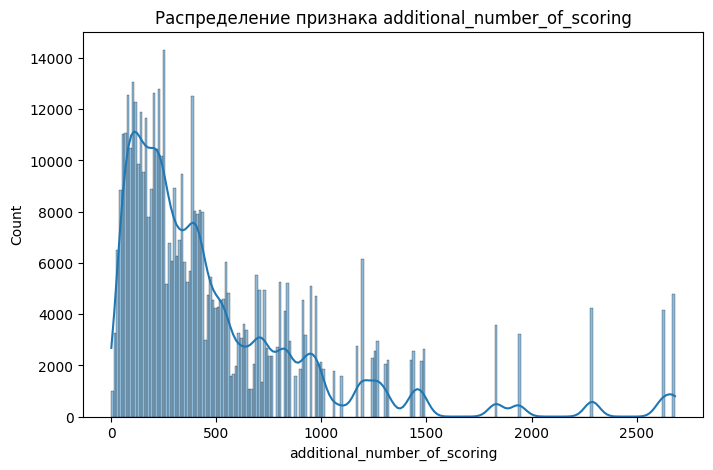

In [31]:
# визуализация распределения признака additional_number_of_scoring:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
histplot = sns.histplot(data=df_v3,
                        x='additional_number_of_scoring',
                        #hue='hotel_name',
                        palette='bright',
                        ax=axes,
                        kde=True,
                        log_scale = False);
histplot.set_title('Распределение признака additional_number_of_scoring');

> Распределение признака additional_number_of_scoring имеет смещенную форму - положительная асимметрия (левостороннее смещенное нормальное распределение). Имеются выбросы в диапазоне значений от 500 до 3000, а также в диапазоне значений от пика распределения до 500.

/tmp/ipykernel_34/609925829.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot = sns.histplot(data=df_v3,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


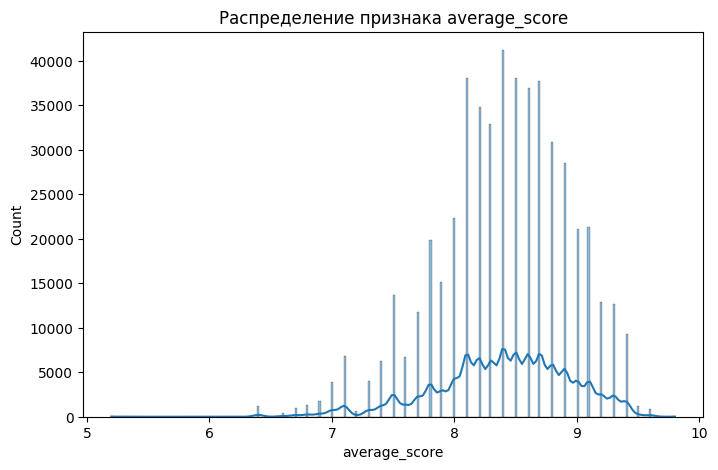

In [32]:
# визуализация распределения признака average_score:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
histplot = sns.histplot(data=df_v3,
                        x='average_score',
                        #hue='hotel_name',
                        palette='bright',
                        ax=axes,
                        kde=True,
                        log_scale = False);
histplot.set_title('Распределение признака average_score');

> Распределение признака average_score имеет смещенную форму - отрицательная асимметрия (правостороннее смещенное нормальное распределение). Имеются выбросы в диапазоне значений от 5 до 8,5.

/tmp/ipykernel_34/1705385704.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot = sns.histplot(data=df_v3,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


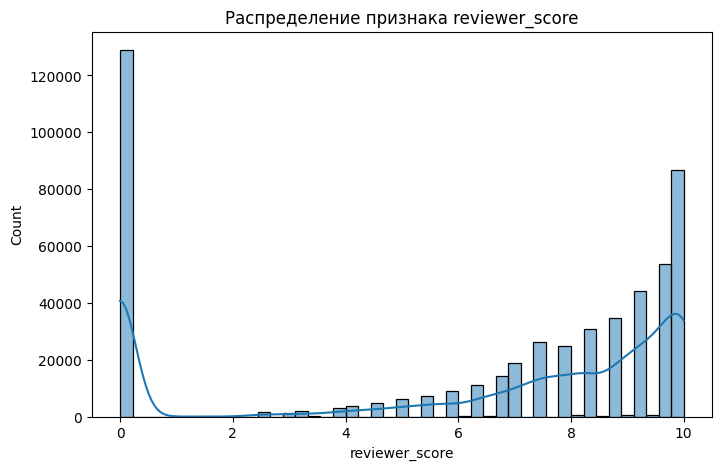

In [33]:
# визуализация распределения признака reviewer_score:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
histplot = sns.histplot(data=df_v3,
                        x='reviewer_score',
                        #hue='hotel_name',
                        palette='bright',
                        ax=axes,
                        kde=True,
                        log_scale = False);
histplot.set_title('Распределение признака reviewer_score');

> Распределение признака average_score имеет смещенную форму - отрицательная асимметрия (правостороннее смещенное нормальное распределение). Имеется скопление данных в области "0" (нуля).

> **Общий ввод по исследованию** распределения признаков с dtype = "int" или "float":
> > - Признаки, которые не были визуализированы имеют большое количество уникальных значений, что может говорить либо об отсутствии закономерностей в распределении, либо в необходимости выделения или преобразования признака в какие-то еще признаки, легче интерпретируемые при анализе данных.
> > - Признаки "lat" и "lng" можно попробовать объединить в геокластер предварительно восстановив значения координат вместо пропусков
> > - Признаки reviewer_score, average_score, additional_number_of_scoring можно попробовать учесть при построении модели на основе алгоритма RandomForestRegressor предварительно закодировав

### 2.2 Исследуем распределение нечисловых признаков

/tmp/ipykernel_34/4000412931.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot = sns.histplot(data=df_v3,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


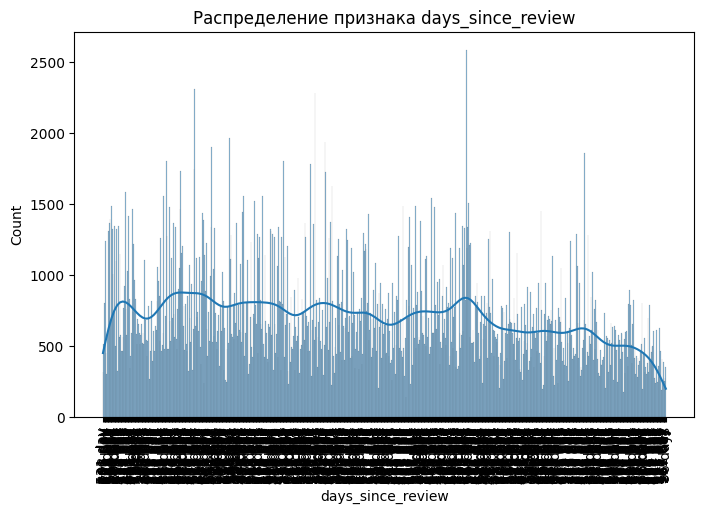

In [34]:
#визуализация распределения признака days_since_review:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
histplot = sns.histplot(data=df_v3,
                        x='days_since_review',
                        #hue='hotel_name',
                        palette='bright',
                        ax=axes,
                        kde=True,
                        log_scale = False);
histplot.set_title('Распределение признака days_since_review');
plt.xticks(rotation=90);

> Распределение признака days_since_review сложно интерпретируемо. Имеются выбросы. Данный признак может быть преобразован в тип int. Исходно, в признак записаны и числовые значения и текстовые значения "day" или "days".

/tmp/ipykernel_34/3041483778.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot = sns.histplot(data=df_v3,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


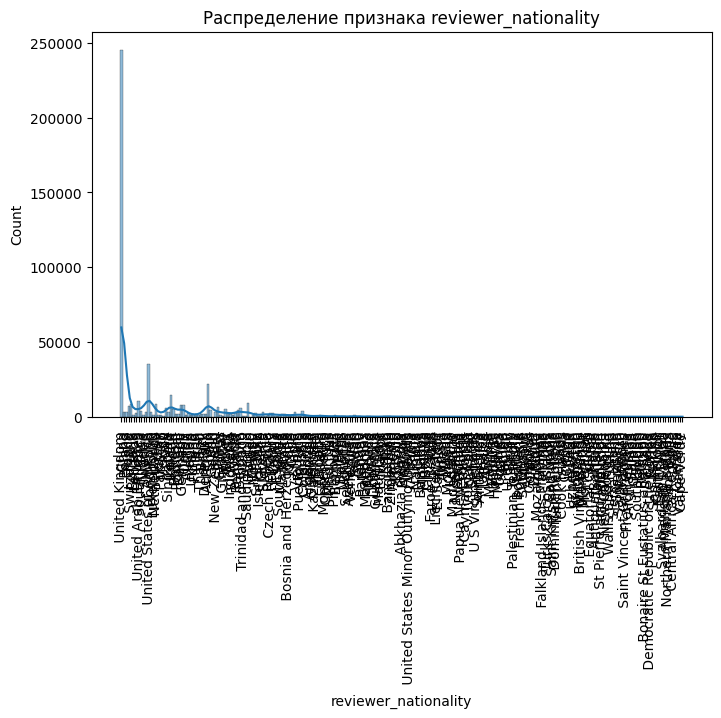

In [35]:
#визуализация распределения признака reviewer_nationality:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
histplot = sns.histplot(data=df_v3,
                        x='reviewer_nationality',
                        #hue='hotel_name',
                        palette='bright',
                        ax=axes,
                        kde=True,
                        log_scale = False);
histplot.set_title('Распределение признака reviewer_nationality');
plt.xticks(rotation=90);

/tmp/ipykernel_34/2978482449.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot = sns.histplot(data=df_v3,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


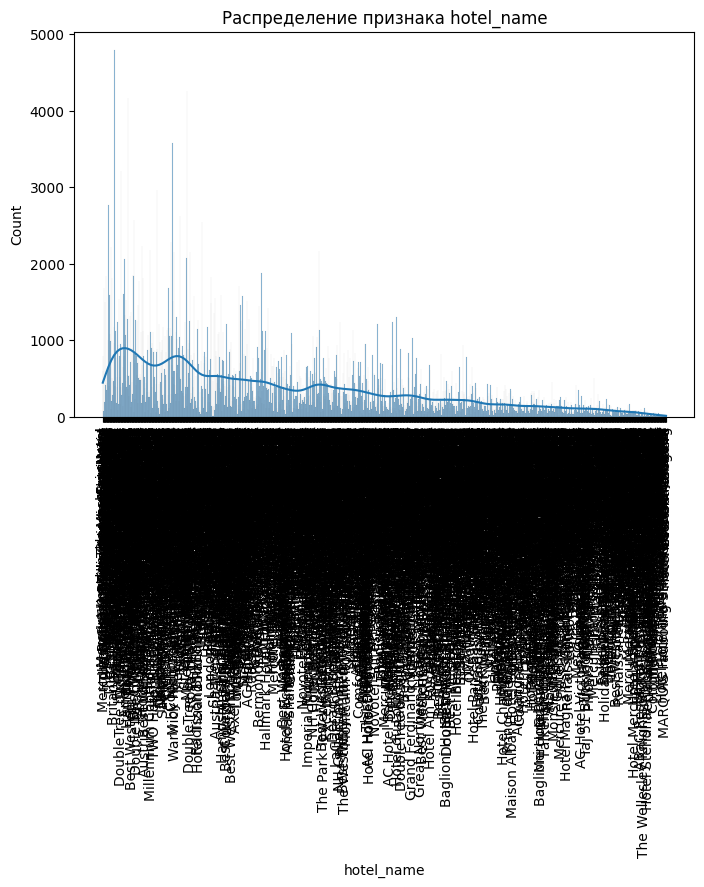

In [36]:
#визуализация распределения признака hotel_name:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
histplot = sns.histplot(data=df_v3,
                        x='hotel_name',
                        #hue='hotel_name',
                        palette='bright',
                        ax=axes,
                        kde=True,
                        log_scale = False);
histplot.set_title('Распределение признака hotel_name')
plt.xticks(rotation=90);

/tmp/ipykernel_34/4074335862.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot = sns.histplot(data=df_v3,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


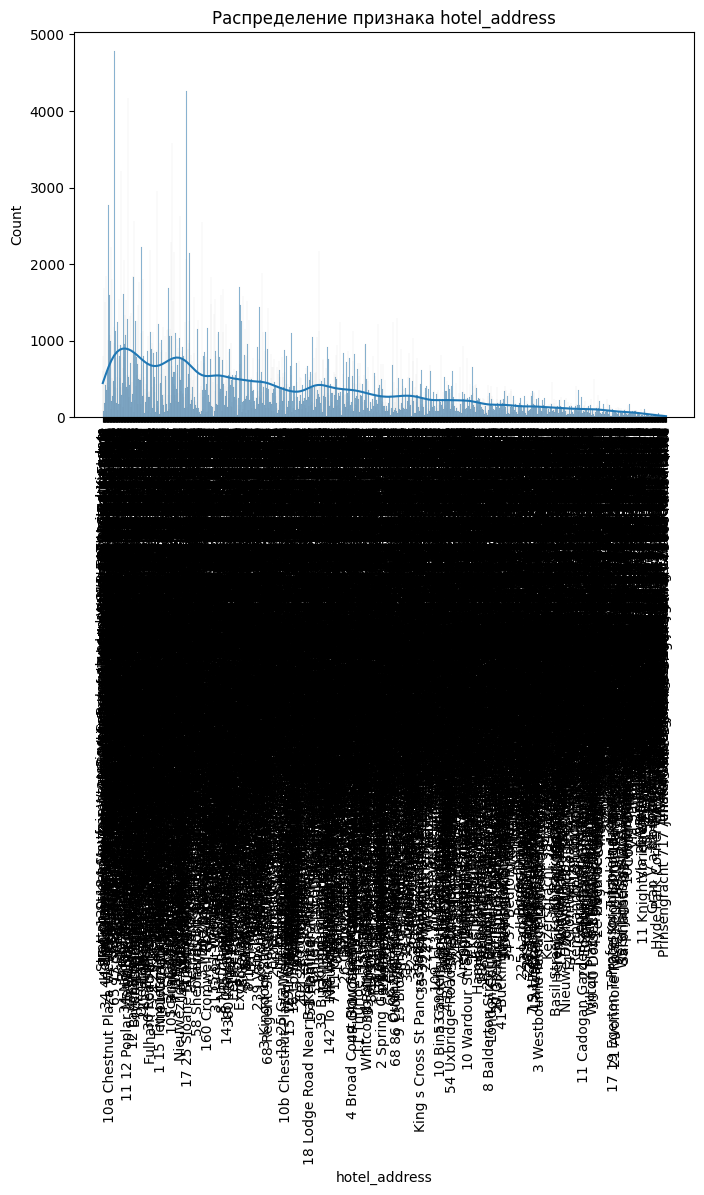

In [37]:
#визуализация распределения признака hotel_address:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
histplot = sns.histplot(data=df_v3,
                        x='hotel_address',
                        #hue='hotel_name',
                        palette='bright',
                        ax=axes,
                        kde=True,
                        log_scale = False);
histplot.set_title('Распределение признака hotel_address');
plt.xticks(rotation=90);

/tmp/ipykernel_34/3013965587.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot = sns.histplot(data=df_v3,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


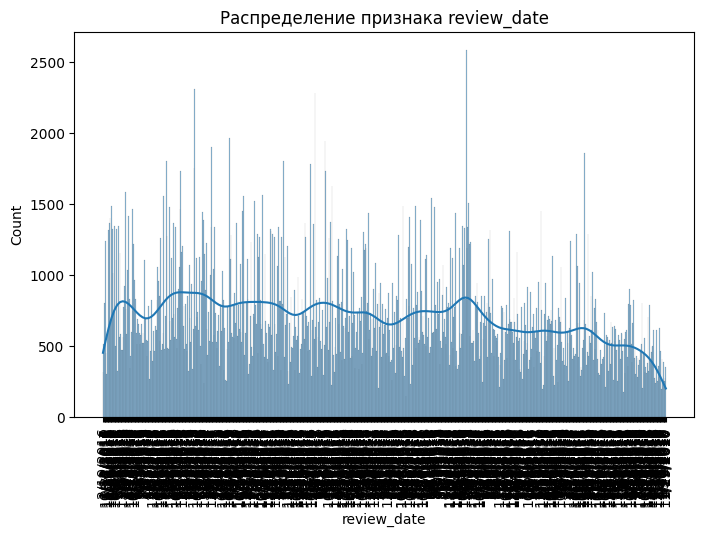

In [38]:
#визуализация распределения признака review_date:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
histplot = sns.histplot(data=df_v3,
                        x='review_date',
                        #hue='hotel_name',
                        palette='bright',
                        ax=axes,
                        kde=True,
                        log_scale = False);
histplot.set_title('Распределение признака review_date');
plt.xticks(rotation=90);

> **Общий ввод по исследованию** распределения признаков с dtype = "object":
> > - из признака hotel_address может быть выделен город расположения отеля и, соответственно, страна; страну отеля можно сопоставить с страной рождения рецензента
> > - из признака review_date могут быть выделены новые признаки: час, день недели, месяц, год
> > - признак hotel_name - можно было бы сопоставить с наименованиями известных сетевых отелей. В данном проекте этого не делаем из-за риска неполноты данных 
> > - из признака reviewer_nationality может быть выделена национальность рецензента, а значит и его страна рождения
> > - из признака negative_review - если заполнен и если не анализировать суть отзыва, то имеет отрицательный оттенок и может быть закодирован как бинарный признак, например, "0". Выполним более сложный анализ признака с применением SentimentIntensityAnalyzer.
> > - признак positive_review - если заполнен и если не анализировать суть отзыва, то имеет положительный оттенок и может быть закодирован как бинарный признак, например, "1". Выполним более сложный анализ признака с применением SentimentIntensityAnalyzer.
> > - из признака tags могут быть выделены новые признаки: время_суток, тип поездки
> > - из признака days_since_review может быть удалены слова "day" и "days" после чего признак превращается в числовой непрерывный

## 3. СОЗДАНИЕ ПРИЗНАКОВ

In [32]:
# выделяем из адреса город и страну отеля:
df_v3['hotel_country'] = df_v3['hotel_address'].apply(lambda x: str(x.split(' ')[-1:])[2:-2])
df_v3['hotel_city'] = df_v3['hotel_address'].apply(lambda x: str(x.split(' ')[-2:-1])[2:-2])
print(df_v3['hotel_country'].value_counts(), "\n")
print(df_v3['hotel_city'].value_counts())

hotel_country
Kingdom        262301
Spain           60149
France          59928
Netherlands     57214
Austria         38939
Italy           37207
Name: count, dtype: int64 

hotel_city
United       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: count, dtype: int64


In [33]:
# вносим изменение в признак "hotel_country" и "hotel_city"
# "Kingdom" заменяем на "United Kingdom"
# "United" заменяем на "London"

df_v3['hotel_country'] = df_v3['hotel_country'].apply(
    lambda x: 'United Kingdom' if x == 'Kingdom' else x)

df_v3['hotel_city'] = df_v3['hotel_city'].apply(
    lambda x: 'London' if x == 'United' else x)

print(df_v3['hotel_country'].value_counts(), "\n")
print(df_v3['hotel_city'].value_counts())

hotel_country
United Kingdom    262301
Spain              60149
France             59928
Netherlands        57214
Austria            38939
Italy              37207
Name: count, dtype: int64 

hotel_city
London       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: count, dtype: int64


In [34]:
# преобразуем признак "review_date" в новые признаки "review_month", "review_weekday", "review_year"

df_v3['review_dt'] = pd.to_datetime(df_v3.review_date,
                                       format='%m/%d/%Y')
df_v3['review_month'] = df_v3.review_dt.dt.month
df_v3['review_weekday'] = df_v3.review_dt.dt.weekday
df_v3['review_year'] = df_v3.review_dt.dt.year

df_v3.drop(['review_dt', 'review_date'], axis = 1, inplace = True)

In [35]:
df_v3.head(3)

hotel_address  \
0  Stratton Street Mayfair Westminster Borough Lo...   
1  130 134 Southampton Row Camden London WC1B 5AF...   
2   151 bis Rue de Rennes 6th arr 75006 Paris France   

   additional_number_of_scoring  average_score  \
0                           581            8.4   
1                           299            8.3   
2                            32            8.9   

                          hotel_name reviewer_nationality  \
0                 The May Fair Hotel      United Kingdom    
1    Mercure London Bloomsbury Hotel      United Kingdom    
2  Legend Saint Germain by Elegancia               China    

       negative_review  review_total_negative_word_counts  \
0             Leaving                                   3   
1       poor breakfast                                  3   
2   No kettle in room                                   6   

   total_number_of_reviews      positive_review  \
0                     1994   Staff were amazing   
1                     1361             location   
2                      406          No Positive   

   review_total_positive_word_counts  ...  \
0                                  4  ...   
1                                  2  ...   
2                                  0  ...   

                                                tags  days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Studio Suite ...            531 day   
1  [' Business trip ', ' Couple ', ' Standard Dou...            203 day   
2  [' Leisure trip ', ' Solo traveler ', ' Modern...            289 day   

         lat       lng  sample   hotel_country  hotel_city review_month  \
0  51.507894 -0.143671       1  United Kingdom      London            2   
1  51.521009 -0.123097       1  United Kingdom      London            1   
2  48.845377  2.325643       1          France       Paris           10   

  review_weekday  review_year  
0              4         2016  
1              3         2017  
2              1         2016  

[3 rows x 22 columns]

In [36]:
# очистим признак "days_since_review" от лишних слов и сделаем его непрерывным:
def remove_non_numberics(s):
    return re.sub('[^0-9]+', '', s)

df_v3['days_since_review'] = df_v3['days_since_review'].apply(remove_non_numberics)
display(df_v3.head(3))

hotel_address  \
0  Stratton Street Mayfair Westminster Borough Lo...   
1  130 134 Southampton Row Camden London WC1B 5AF...   
2   151 bis Rue de Rennes 6th arr 75006 Paris France   

   additional_number_of_scoring  average_score  \
0                           581            8.4   
1                           299            8.3   
2                            32            8.9   

                          hotel_name reviewer_nationality  \
0                 The May Fair Hotel      United Kingdom    
1    Mercure London Bloomsbury Hotel      United Kingdom    
2  Legend Saint Germain by Elegancia               China    

       negative_review  review_total_negative_word_counts  \
0             Leaving                                   3   
1       poor breakfast                                  3   
2   No kettle in room                                   6   

   total_number_of_reviews      positive_review  \
0                     1994   Staff were amazing   
1                     1361             location   
2                      406          No Positive   

   review_total_positive_word_counts  ...  \
0                                  4  ...   
1                                  2  ...   
2                                  0  ...   

                                                tags  days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Studio Suite ...                531   
1  [' Business trip ', ' Couple ', ' Standard Dou...                203   
2  [' Leisure trip ', ' Solo traveler ', ' Modern...                289   

         lat       lng  sample   hotel_country  hotel_city review_month  \
0  51.507894 -0.143671       1  United Kingdom      London            2   
1  51.521009 -0.123097       1  United Kingdom      London            1   
2  48.845377  2.325643       1          France       Paris           10   

  review_weekday  review_year  
0              4         2016  
1              3         2017  
2              1         2016  

[3 rows x 22 columns]

In [37]:
df_v3['days_since_review']= df_v3['days_since_review'].astype(int)
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   average_score                               515738 non-null  float64
 3   hotel_name                                  515738 non-null  object 
 4   reviewer_nationality                        515738 non-null  object 
 5   negative_review                             515738 non-null  object 
 6   review_total_negative_word_counts           515738 non-null  int64  
 7   total_number_of_reviews                     515738 non-null  int64  
 8   positive_review                             515738 non-null  object 
 9   review_total_positive_word_counts           515738 non-null  int64  
 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


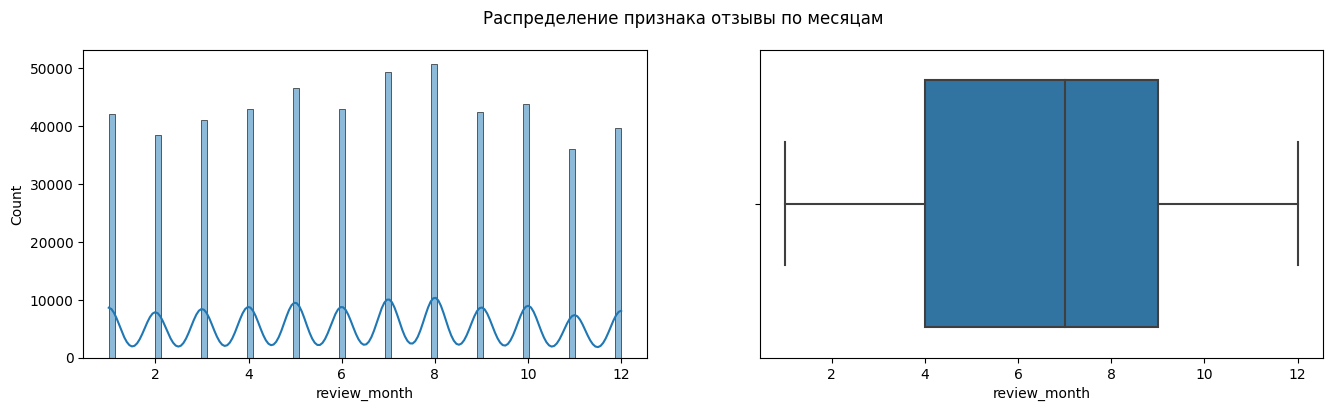

In [38]:
# Визуализируем распределение новых признаков по отношению к количеству отзывов:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
fig.suptitle('Распределение признака отзывы по месяцам')
histplot = sns.histplot(x=df_v3['review_month'],
                        ax=axes[0],
                        kde=True
                       );
boxplot = sns.boxplot(x=df_v3['review_month'], ax=axes[1]);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


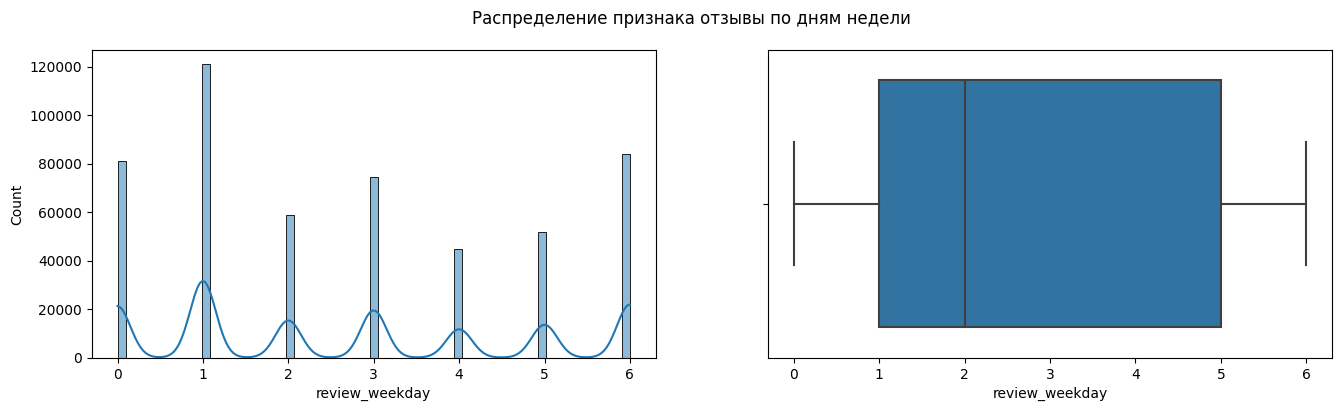

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
fig.suptitle('Распределение признака отзывы по дням недели')
histplot = sns.histplot(x=df_v3['review_weekday'],
                        ax=axes[0],
                        kde=True
                       );
boxplot = sns.boxplot(x=df_v3['review_weekday'], ax=axes[1]);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


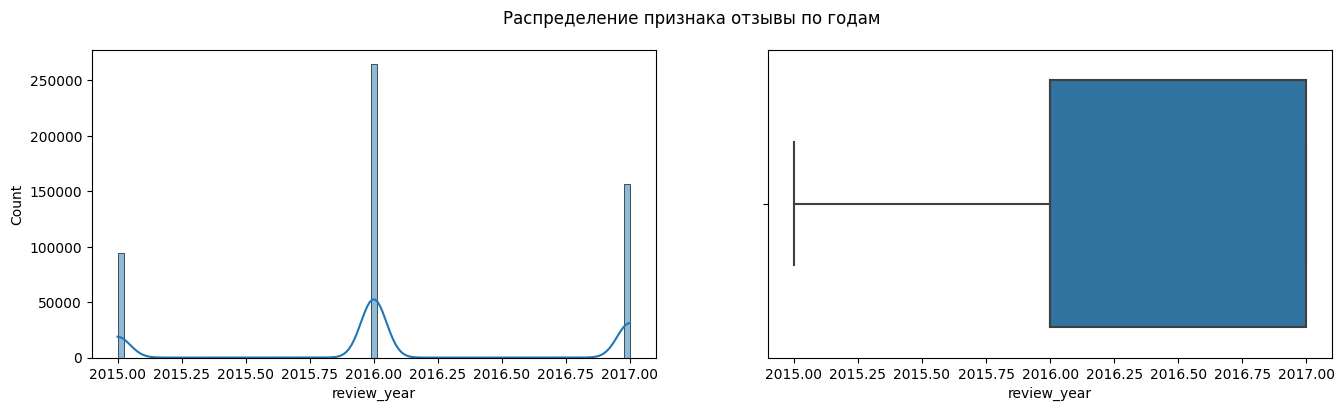

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
fig.suptitle('Распределение признака отзывы по годам')
histplot = sns.histplot(x=df_v3['review_year'],
                        ax=axes[0],
                        kde=True
                       );
boxplot = sns.boxplot(x=df_v3['review_year'], ax=axes[1]);

> В летний период отзывов об отелях оставляют больше, что связано с периодом отпусков
>
> В течение недели наиболее активные дни - понедельник, вторник и воскресенье (0-понедельник, 6 - воскресенье)
>
> 2016 год - в этом году наблюдается пик активности в части написания отзывов об отелях; возможно это связано с ростом популярности онлайн-отзывов. Как следствие - накручивание рейтинга для популяризации отелей.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


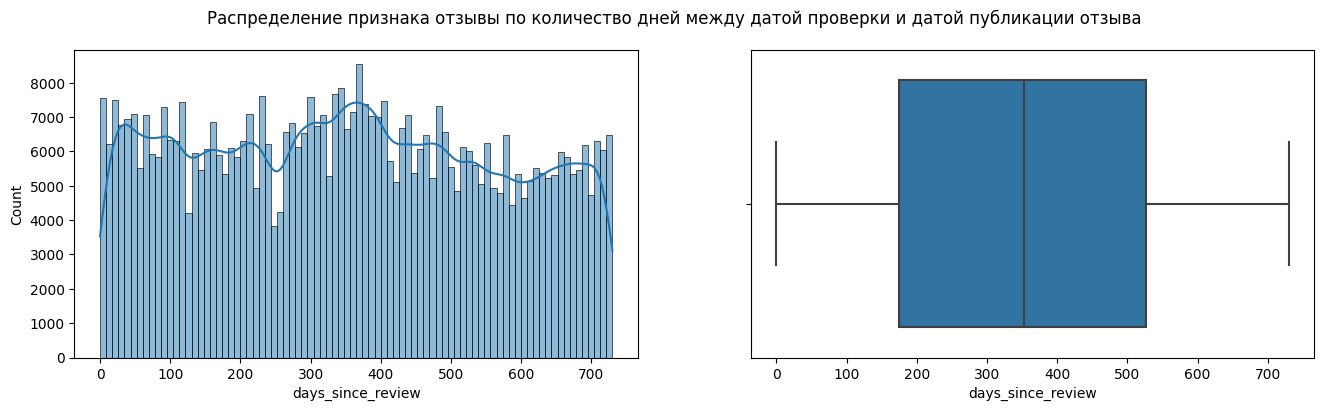

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
fig.suptitle('Распределение признака отзывы по количество дней между датой проверки и датой публикации отзыва')
histplot = sns.histplot(x=df_v3['days_since_review'], ax=axes[0], kde=True);
boxplot = sns.boxplot(x=df_v3['days_since_review'], ax=axes[1]);

> Признак "days_since_review" кажется бесполезным и кандидатом для удаления

In [38]:
# промежуточная проверка на мультиколлинеарность
# корреляция признаков (оставляем только сильную связь для наглядности)
pivot = df_v3.corr(numeric_only=True).round(3)
pivot = pivot.drop(['sample', 'reviewer_score'], axis=0)
pivot = pivot.drop(['sample', 'reviewer_score'], axis=1)

for col in pivot:
    pivot[col] = pivot[col].apply(lambda x: np.nan if (abs(x) < 0.85 or x == 1) else x)
# for col in pivot:
#     pivot = pivot.dropna(how='all')
#     pivot = pivot.dropna(how='all', axis='columns')

fig = px.imshow(pivot,
                text_auto=True,
                height=700,
                color_continuous_scale='balance',
                aspect="auto",
                zmin=-1,
                zmax=1
                )

fig.show()

> При промежуточной проверке мультиколлинеарности - обнаруживается сильная мультиколлинеарность между признаками review_year и days_since_review. Поэтому, один из этих двух признаков - кандидат на удаление.

In [40]:
# проанализируем признак "reviewer_nationality":

print(f'Количество уникальних значений в столбце национальности: {df_v3.reviewer_nationality.nunique()}')
round(df_v3['reviewer_nationality'].value_counts(normalize=True).head(17), 3) * 100

Количество уникальних значений в столбце национальности: 227


reviewer_nationality
United Kingdom               47.6
United States of America      6.9
Australia                     4.2
Ireland                       2.9
United Arab Emirates          2.0
Saudi Arabia                  1.7
Netherlands                   1.7
Switzerland                   1.7
Germany                       1.5
Canada                        1.5
France                        1.4
Israel                        1.3
Italy                         1.2
Belgium                       1.2
Turkey                        1.1
Kuwait                        1.0
Spain                         0.9
Name: proportion, dtype: float64

In [41]:
# Сохраняем первые 17 национальностей в списке рецензентов (> 1%):
nationality_list = df_v3['reviewer_nationality'].value_counts().head(16).index

# Изменяем значение для остатка (национальности вне список 17 ) как `other`:
df_v3['reviewer_nationality'] = df_v3['reviewer_nationality'].apply(lambda x: x.strip() if x in nationality_list else 'Other')
df_v3.head(5)

hotel_address  \
0  Stratton Street Mayfair Westminster Borough Lo...   
1  130 134 Southampton Row Camden London WC1B 5AF...   
2   151 bis Rue de Rennes 6th arr 75006 Paris France   
3  216 Avenue Jean Jaures 19th arr 75019 Paris Fr...   
4          Molenwerf 1 1014 AG Amsterdam Netherlands   

   additional_number_of_scoring  average_score  \
0                           581            8.4   
1                           299            8.3   
2                            32            8.9   
3                            34            7.5   
4                           914            8.5   

                                  hotel_name reviewer_nationality  \
0                         The May Fair Hotel       United Kingdom   
1            Mercure London Bloomsbury Hotel       United Kingdom   
2          Legend Saint Germain by Elegancia                Other   
3  Mercure Paris 19 Philharmonie La Villette       United Kingdom   
4                Golden Tulip Amsterdam West                Other   

       negative_review  review_total_negative_word_counts  \
0             Leaving                                   3   
1       poor breakfast                                  3   
2   No kettle in room                                   6   
3          No Negative                                  0   
4         Torn sheets                                   4   

   total_number_of_reviews                                    positive_review  \
0                     1994                                 Staff were amazing   
1                     1361                                           location   
2                      406                                        No Positive   
3                      607   Friendly staff quiet comfortable room spotles...   
4                     7586   The staff was very friendly and helpful Break...   

   review_total_positive_word_counts  ...  \
0                                  4  ...   
1                                  2  ...   
2                                  0  ...   
3                                 11  ...   
4                                 20  ...   

                                                tags  days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Studio Suite ...                531   
1  [' Business trip ', ' Couple ', ' Standard Dou...                203   
2  [' Leisure trip ', ' Solo traveler ', ' Modern...                289   
3  [' Leisure trip ', ' Solo traveler ', ' Standa...                681   
4  [' Business trip ', ' Couple ', ' Standard Dou...                516   

         lat       lng  sample   hotel_country  hotel_city review_month  \
0  51.507894 -0.143671       1  United Kingdom      London            2   
1  51.521009 -0.123097       1  United Kingdom      London            1   
2  48.845377  2.325643       1          France       Paris           10   
3  48.888697  2.394540       1          France       Paris            9   
4  52.385601  4.847060       1     Netherlands   Amsterdam            3   

  review_weekday  review_year  
0              4         2016  
1              3         2017  
2              1         2016  
3              1         2015  
4              5         2016  

[5 rows x 22 columns]

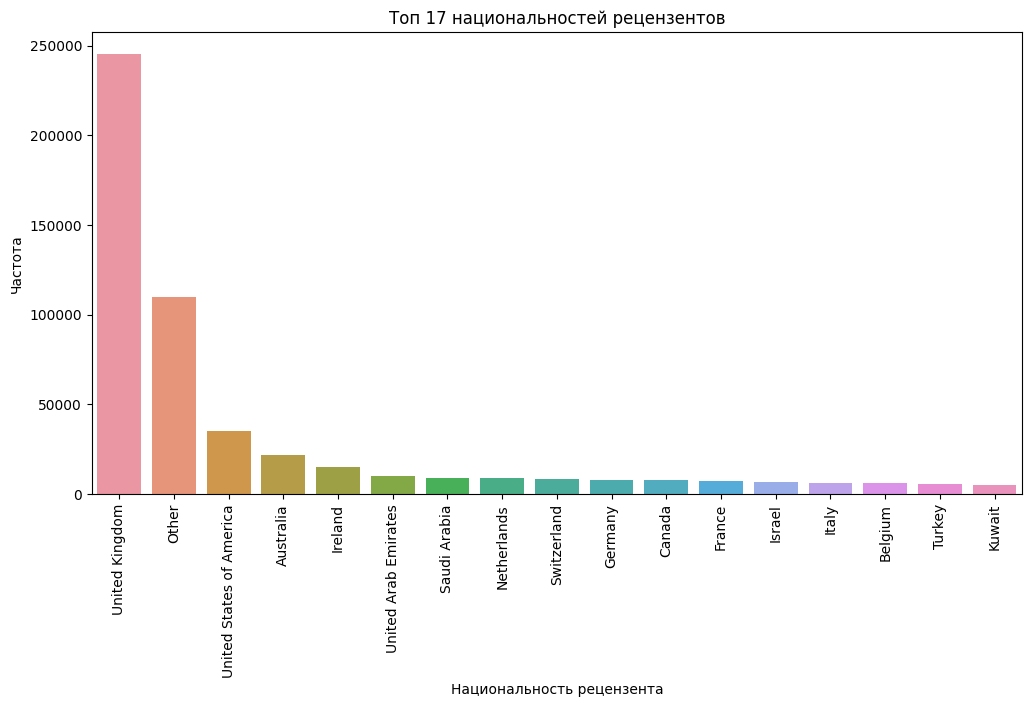

In [143]:
# Визуализируем частоту распределения национальностей рецензентов, стран, в которых расположены отели
plt.figure(figsize=(12, 6))
sns.barplot(x=df_v3['reviewer_nationality'].value_counts().index[:17],
            y=df_v3['reviewer_nationality'].value_counts().values[:17])
plt.xticks(rotation=90)
plt.title('Топ 17 национальностей рецензентов')
plt.xlabel('Национальность рецензента')
plt.ylabel('Частота')
plt.show()

> Принимаем, что национальность рецензента соответсвует стране рождения рецензента

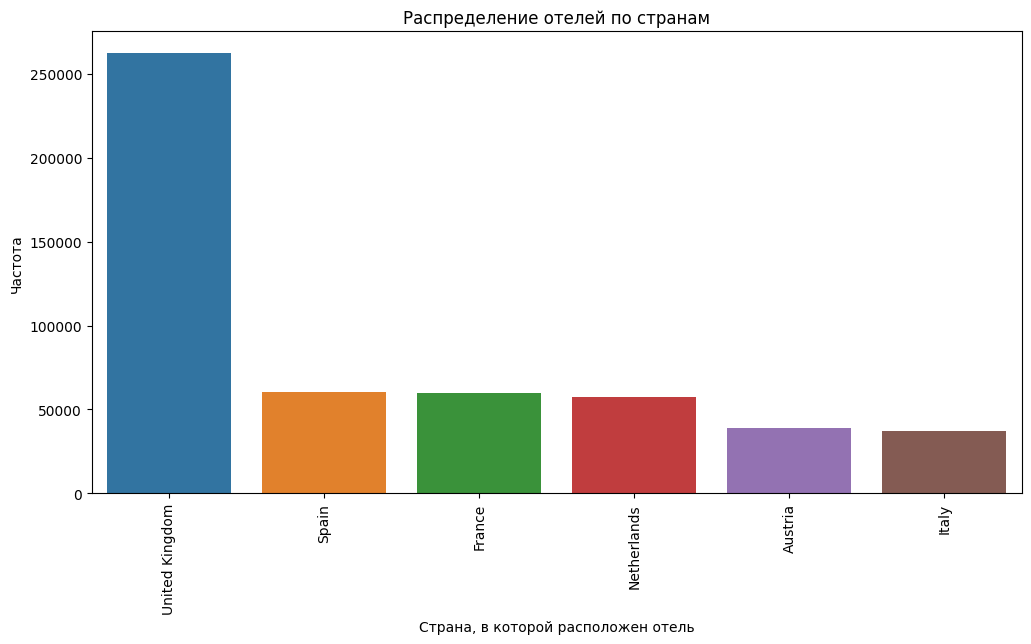

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_v3['hotel_country'].value_counts().index[:17],
            y=df_v3['hotel_country'].value_counts().values[:17])
plt.xticks(rotation=90)
plt.title('Распределение отелей по странам')
plt.xlabel('Страна, в которой расположен отель')
plt.ylabel('Частота')
plt.show()

In [42]:
# создаем признак указывающий на совпадение страны отеля и человека оставившего отзыв
def contry_of_reviewer(row):
    if row['reviewer_nationality'] in row['hotel_address']:
        return 1
    else:
        return 0
df_v3['reviewer_nationality_hotel_country'] = df_v3[['reviewer_nationality', 'hotel_address']].apply(contry_of_reviewer, axis=1)

df_v3['reviewer_nationality_hotel_country'].value_counts()

reviewer_nationality_hotel_country
0    340045
1    175693
Name: count, dtype: int64

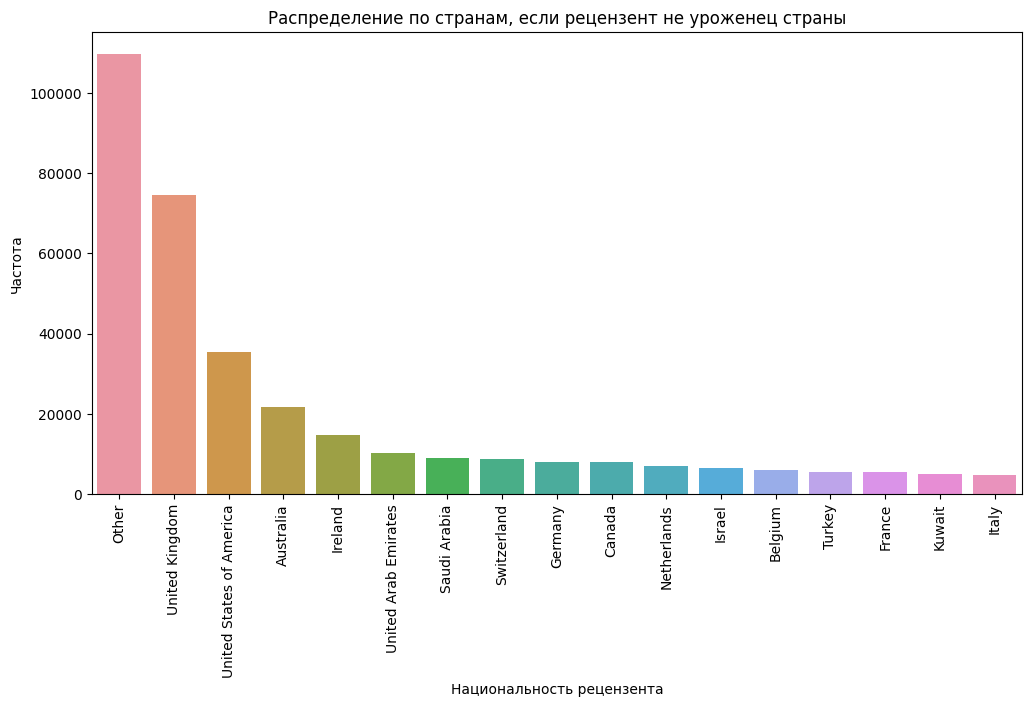

In [55]:
# визуализируем новый признак - reviewer_nationality_hotel_country:
mask = df_v3[df_v3['reviewer_nationality_hotel_country']==0]
plt.figure(figsize=(12, 6))
sns.barplot(x=mask['reviewer_nationality'].value_counts().index[:17],
            y=mask['reviewer_nationality'].value_counts().values[:17]
            #data=df_v3.value_counts().values[:17],
            #hue='hotel_country'
           )
plt.xticks(rotation=90)
plt.title('Распределение по странам, если рецензент не уроженец страны')
plt.xlabel('Национальность рецензента')
plt.ylabel('Частота')
plt.show()

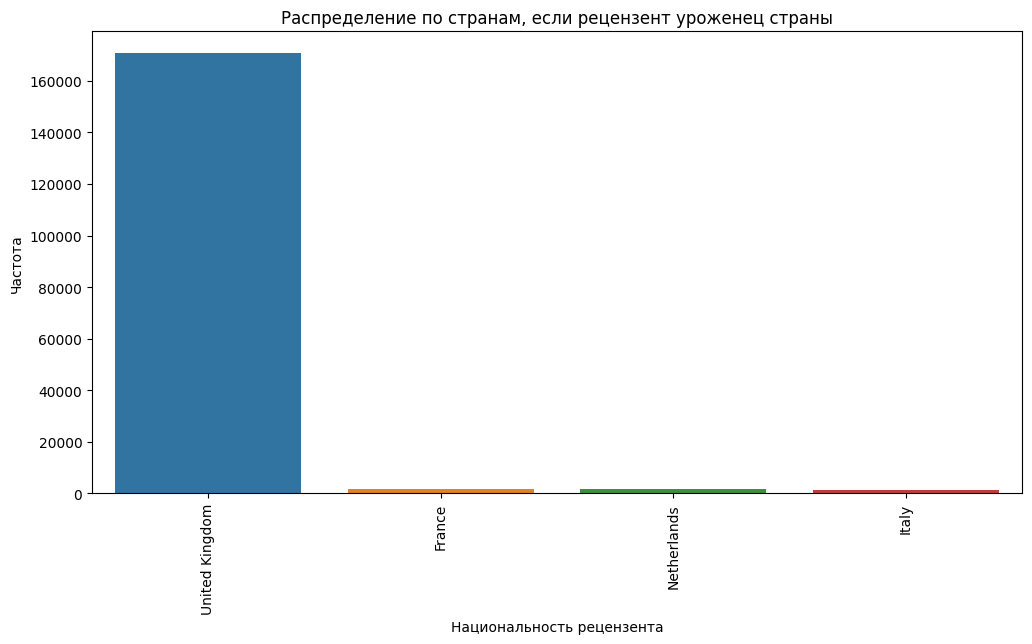

In [56]:
# визуализируем новый признак - reviewer_nationality_hotel_country:
mask = df_v3[df_v3['reviewer_nationality_hotel_country']==1]
plt.figure(figsize=(12, 6))
sns.barplot(x=mask['reviewer_nationality'].value_counts().index[:17],
            y=mask['reviewer_nationality'].value_counts().values[:17]
            #data=df_v3.value_counts().values[:17],
            #hue='hotel_country'
           )
plt.xticks(rotation=90)
plt.title('Распределение по странам, если рецензент уроженец страны')
plt.xlabel('Национальность рецензента')
plt.ylabel('Частота')
plt.show()

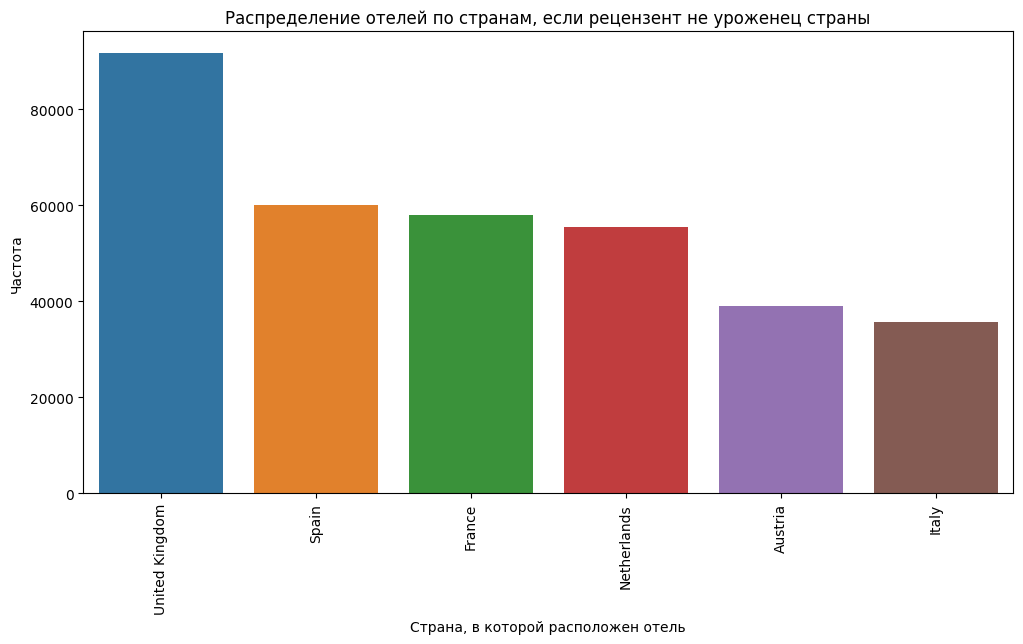

In [57]:
mask = df_v3[df_v3['reviewer_nationality_hotel_country']==0]
plt.figure(figsize=(12, 6))
sns.barplot(x=mask['hotel_country'].value_counts().index[:17],
            y=mask['hotel_country'].value_counts().values[:17]
            #data=df_v3.value_counts().values[:17],
            #hue='hotel_country'
           )
plt.xticks(rotation=90)
plt.title('Распределение отелей по странам, если рецензент не уроженец страны')
plt.xlabel('Страна, в которой расположен отель')
plt.ylabel('Частота')
plt.show()

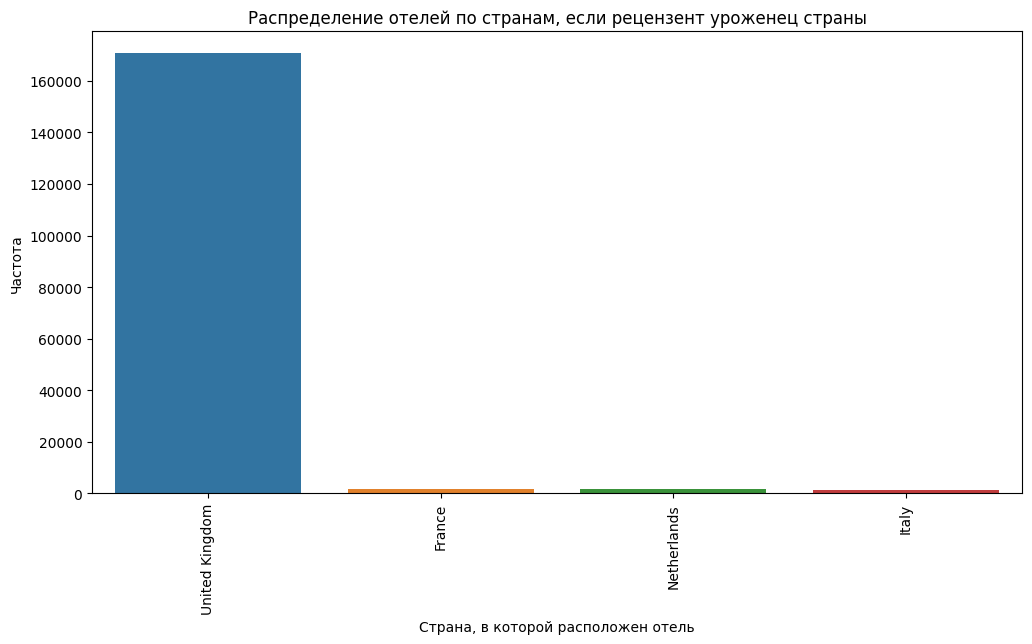

In [43]:
mask = df_v3[df_v3['reviewer_nationality_hotel_country']==1]
plt.figure(figsize=(12, 6))
sns.barplot(x=mask['hotel_country'].value_counts().index[:17],
            y=mask['hotel_country'].value_counts().values[:17]
            #data=df_v3.value_counts().values[:17],
            #hue='hotel_country'
           )
plt.xticks(rotation=90)
plt.title('Распределение отелей по странам, если рецензент уроженец страны')
plt.xlabel('Страна, в которой расположен отель')
plt.ylabel('Частота')
plt.show()

> Получились достаточно интересные распределения. Возможно предположить, что отзывы о отелях в основном оставляют туристы, не являющиеся уроженцами страны, в которой расположен отель. Исключение составляет Великобритания, Франция, Нидерланды и Италия.

In [44]:
# выделим из признака "tags" 15 наиболее популярных тегов:
# Для начала сформируем список из типовых тегов взятых из признака "tags"
#tags = df_v3['tags']

def taglist(tag):
    tag = tag.replace('[', '')
    tag = tag.replace(']', '')
    tag = tag.replace("' ", '')
    tag = tag.replace(" '", '')

    return tag

tags = df_v3['tags'].apply(taglist)

tag_lst = []
for row in tags:
    for tag in row.split(', '):
        tag_lst.append(tag)

# посмотрим на количество уникальных тэгов    
display(len(set(tag_lst)))

2428

In [45]:
df_v3['tags'] = df_v3['tags'].apply(taglist)

tag_dict = {}

for item in tag_lst:
    if item in tag_dict.keys():
        tag_dict[item] += 1
    else:
        tag_dict.update({item: 1})


sorted_tag_dict = sorted(tag_dict.items(), key=lambda x: x[1], reverse=True)

# посмотрим на популярные тэги 
display(sorted_tag_dict)

[('Leisure trip', 417778),
 ('Submitted from a mobile device', 307640),
 ('Couple', 252294),
 ('Stayed 1 night', 193645),
 ('Stayed 2 nights', 133937),
 ('Solo traveler', 108545),
 ('Stayed 3 nights', 95821),
 ('Business trip', 82939),
 ('Group', 65392),
 ('Family with young children', 61015),
 ('Stayed 4 nights', 47817),
 ('Double Room', 35207),
 ('Standard Double Room', 32248),
 ('Superior Double Room', 31393),
 ('Family with older children', 26349),
 ('Deluxe Double Room', 24823),
 ('Double or Twin Room', 22393),
 ('Stayed 5 nights', 20845),
 ('Standard Double or Twin Room', 17483),
 ('Classic Double Room', 16989),
 ('Superior Double or Twin Room', 13570),
 ('2 rooms', 12393),
 ('Stayed 6 nights', 9776),
 ('Standard Twin Room', 9745),
 ('Single Room', 9670),
 ('Twin Room', 8321),
 ('Stayed 7 nights', 7399),
 ('Executive Double Room', 6425),
 ('Classic Double or Twin Room', 6107),
 ('Superior Twin Room', 6064),
 ('Deluxe Double or Twin Room', 5998),
 ('Club Double Room', 5908),
 ('Qu

In [47]:
# создаем словарь из популярных тэгов
pop_tag_dict  = {}

for key, value in tag_dict.items():
    if value > 3000: # соответсвует 42 популярным
        pop_tag_dict.update({key: value})
        
        
# сократим тэги
def taglist(tag):
    for item in tag:
        if item not in pop_tag_dict.keys():
            item = 'Other'
    return tag

df_v3['tags'] = df_v3['tags'].apply(taglist)

In [48]:
# создадим столбцы c популярными тэгами
for col in pop_tag_dict.keys():
    df_v3[f"tag_{col}"] = df_v3['tags'].apply(lambda x : 1 if col in x else 0 )

In [49]:
# посмотрим на общее количество признаков и на их тип:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 72 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   average_score                               515738 non-null  float64
 3   hotel_name                                  515738 non-null  object 
 4   reviewer_nationality                        515738 non-null  object 
 5   negative_review                             515738 non-null  object 
 6   review_total_negative_word_counts           515738 non-null  int64  
 7   total_number_of_reviews                     515738 non-null  int64  
 8   positive_review                             515738 non-null  object 
 9   review_total_positive_word_counts           515738 non-null  int64  
 

In [50]:
# создадим новый признак - расстояние до центра города:
# (для этого используем данные о широте и долготе)
# Объединяем координаты в новый признак
df_v3['coord'] = list(zip(df_v3['lat'], df_v3['lng']))

# Создаём таблицу с городами и координатами их центров
df_center = pd.DataFrame(
            {'hotel_city':['London',
                           'Amsterdam',
                           'Barcelona',
                           'Milan',
                           'Vienna',
                           'Paris'],
             'coord_center':[(51.5085, -0.12574),
                             (52.374, 4.88969),
                             (41.3888, 2.15899),
                             (45.4643, 9.18951),
                             (48.2085, 16.3721),
                             (48.8534, 2.3488)]}
)

# Объединяем таблицы по признаку "city"
df_v3 = df_v3.merge(df_center, on = 'hotel_city', how = 'left')

# Функция для определения расстояние между координатами
def get_distance(coord):
    coord_hotels = coord['coord']
    coord_center = coord['coord_center']
    return round(GD(coord_hotels, coord_center).km, 1)

df_v3['distance'] = df_v3.apply(get_distance, axis = 1)
df_v3 = df_v3.drop(['coord', 'coord_center'], axis=1)

In [51]:
#проверяем результат расчета расстояния от отеля до центра:
df_v3.sample(3)

hotel_address  \
265780  16 London Street Paddington Westminster Boroug...   
228090      11 15 Rue De Lyon 12th arr 75012 Paris France   
397217  Imperial Road Hammersmith and Fulham London SW...   

        additional_number_of_scoring  average_score  \
265780                           114            8.7   
228090                           205            8.3   
397217                           360            8.3   

                                     hotel_name      reviewer_nationality  \
265780           Hotel Indigo London Paddington                     Other   
228090  Holiday Inn Paris Gare de Lyon Bastille  United States of America   
397217      DoubleTree by Hilton London Chelsea            United Kingdom   

                                          negative_review  \
265780   We ve been twice in a short period The first ...   
228090                                        No Negative   
397217                                    Nothing at all    

        review_total_negative_word_counts  total_number_of_reviews  \
265780                                 57                      602   
228090                                  0                     2200   
397217                                  5                     1181   

                                          positive_review  \
265780   The staff s friendliness and attitude towards...   
228090                 Friendly staff and great bartender   
397217             Very comfy beds good reception service   

        review_total_positive_word_counts  ...  tag_Standard Single Room  \
265780                                 41  ...                         0   
228090                                  6  ...                         0   
397217                                  7  ...                         0   

        tag_Deluxe Double or Twin Room tag_Stayed 7 nights  \
265780                               0                   0   
228090                               0                   0   
397217                               0                   0   

        tag_Superior King Room  tag_Superior Double or Twin Room  \
265780                       0                                 0   
228090                       0                                 0   
397217                       0                                 0   

        tag_Superior Queen Room  tag_Junior Suite tag_Small Double Room  \
265780                        0                 0                     0   
228090                        0                 0                     0   
397217                        0                 0                     0   

       tag_Deluxe Room  distance  
265780               0       3.4  
228090               0       1.8  
397217               0       5.6  

[3 rows x 73 columns]

In [52]:
# проверяем структуру датасета:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 73 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   average_score                               515738 non-null  float64
 3   hotel_name                                  515738 non-null  object 
 4   reviewer_nationality                        515738 non-null  object 
 5   negative_review                             515738 non-null  object 
 6   review_total_negative_word_counts           515738 non-null  int64  
 7   total_number_of_reviews                     515738 non-null  int64  
 8   positive_review                             515738 non-null  object 
 9   review_total_positive_word_counts           515738 non-null  int64  
 

> Признаки начинающиеся с tag_*** - уже закодированы бинарным кодом: 0 или 1. Повторно их не нужно кодировать.
> После кодирования остальных признаков:
> - признаки hotel_address, hotel_name, reviewer_nationality, tags могут быть удалены из-за отсутствия информативности. Нужные данные о стране, городе, отеле хранятся теперь в других вновь созданных признаках.
> - признаки lat, lng могут быть удалены из-за отсутствия информативности.

In [53]:
#сохраняем резервную копию датасета с новыми признаками:
data_features = df_v3.copy()

## 4. ПРЕОБРАЗОВАНИЕ (КОДИРОВАНИЕ) ПРИЗНАКОВ

кодируем следующие признаки:
- признак hotel_country
- признак hotel_city
- признак review_month
- признак review_weekday
- признак review_year
- признак reviewer_nationality
- признак hotel_name
- признак negative_review
- признак positive_review

In [54]:
# Значения признаков 'hotel_country', 'hotel_city',
# 'review_weekday', 'review_month','review_year' представлены небольшим количеством
# категорий, то используем метод однократного кодирования pd.get_dummies
cols = ['hotel_country', 'hotel_city', 'review_weekday',
        'review_month',  'review_year']

df_v3 = pd.get_dummies(df_v3, columns=cols, dtype=int)

In [55]:
# Кодируем признаки 'reviewer_nationality' и 'hotel_name'
# метод двоичного кодирования BinaryEncoder

bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality'])
nationality_bin = bin_encoder.fit_transform(df_v3['reviewer_nationality'])
df_v3 = pd.concat([df_v3, nationality_bin], axis=1)

In [56]:
bin_encoder = ce.BinaryEncoder(cols=['hotel_name'])
hotel_name_bin = bin_encoder.fit_transform(df_v3['hotel_name'])
df_v3 = pd.concat([df_v3, hotel_name_bin], axis=1)

In [57]:
# удаляем не информативные признаки:
df_v3 = df_v3.drop(['hotel_address', 'hotel_name',
                    'reviewer_nationality','tags', 'lat', 'lng'],
                   axis=1)

In [58]:
# проверим полученный датасет:
df_v3.head(2)

additional_number_of_scoring  average_score  negative_review  \
0                           581            8.4         Leaving    
1                           299            8.3   poor breakfast   

   review_total_negative_word_counts  total_number_of_reviews  \
0                                  3                     1994   
1                                  3                     1361   

       positive_review  review_total_positive_word_counts  \
0   Staff were amazing                                  4   
1             location                                  2   

   total_number_of_reviews_reviewer_has_given  reviewer_score  \
0                                           7            10.0   
1                                          14             6.3   

   days_since_review  ...  hotel_name_1  hotel_name_2  hotel_name_3  \
0                531  ...             0             0             0   
1                203  ...             0             0             0   

   hotel_name_4  hotel_name_5  hotel_name_6  hotel_name_7  hotel_name_8  \
0             0             0             0             0             0   
1             0             0             0             0             0   

   hotel_name_9  hotel_name_10  
0             0              1  
1             1              0  

[2 rows x 112 columns]

In [59]:
# проверяем структуру датасета после кодирования и удаления признаков:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Columns: 112 entries, additional_number_of_scoring to hotel_name_10
dtypes: float64(3), int64(107), object(2)
memory usage: 440.7+ MB


In [60]:
#сохраняем резервную копию датасета с кодированными признаками:
data_features_coder = df_v3.copy()

## 5. АНАЛИЗ ТЕКСТОВЫХ ОТЗЫВОВ

In [61]:
# Основываясь на отрицательных и положительных отзывах,
# преобразуем их и сформируем новые признаки
# для каждого типа отзыва создадим четыре новых признака:
# Положительный, Отрицательный и Нейтральный, Метрика оценки (compound)
# Compound - is the sum of positive, negative & neutral scores
# which is then normalized between -1(most extreme negative)
# and +1 (most extreme positive).
# The more Compound score closer to +1, the higher the positivity of the text

sent_analyzer = SentimentIntensityAnalyzer()
df_v3['scores_negative'] = df_v3['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x))
df_v3['scores_positive'] = df_v3['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x))

# Создадим списки позитивных и отрицательных категорий результатов
# для применения цикла:
neg_cats = ['negative_neg', 'negative_neu', 'negative_pos', 'negative_compound']
pos_cats = ['positive_neg', 'positive_neu', 'positive_pos', 'positive_compound']

In [62]:
# Создадим признаки по категориям результатов:
for neg_c, pos_c, i in zip(neg_cats, pos_cats, range(len(neg_cats))):
    df_v3[neg_c] = df_v3['scores_negative'].apply(lambda x: list(x.values())[i])
    df_v3[pos_c] = df_v3['scores_positive'].apply(lambda x: list(x.values())[i])

# удаляем не информативные и не нужные признаки:
df_v3 = df_v3.drop(['scores_negative', 'scores_positive',
                   'negative_review', 'positive_review'], axis=1)

In [63]:
# проверим полученный датасет:
df_v3.sample(2)

additional_number_of_scoring  average_score  \
509195                           207            8.5   
99013                             37            8.6   

        review_total_negative_word_counts  total_number_of_reviews  \
509195                                  3                     2601   
99013                                   0                      564   

        review_total_positive_word_counts  \
509195                                  5   
99013                                  26   

        total_number_of_reviews_reviewer_has_given  reviewer_score  \
509195                                          24             0.0   
99013                                            1             9.2   

        days_since_review  sample  reviewer_nationality_hotel_country  ...  \
509195                 99       0                                   0  ...   
99013                   3       1                                   0  ...   

        hotel_name_9  hotel_name_10  negative_neg  positive_neg  negative_neu  \
509195             0              1           0.0           0.0           1.0   
99013              0              1           1.0           0.0           0.0   

        positive_neu  negative_pos  positive_pos  negative_compound  \
509195         0.334           0.0         0.666             0.0000   
99013          0.496           0.0         0.504            -0.7096   

        positive_compound  
509195             0.6115  
99013              0.9600  

[2 rows x 118 columns]

In [64]:
# проверяем структуру датасета после кодирования и удаления признаков:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Columns: 118 entries, additional_number_of_scoring to positive_compound
dtypes: float64(11), int64(107)
memory usage: 464.3 MB


In [65]:
#сохраняем резервную копию датасета с кодированными признаками
# и разметкой отзывов:
df_eda = df_v3.copy()

## 6. АНАЛИЗ МУЛЬТИКОЛЛИНЕАРНОСТИ


<Axes: >

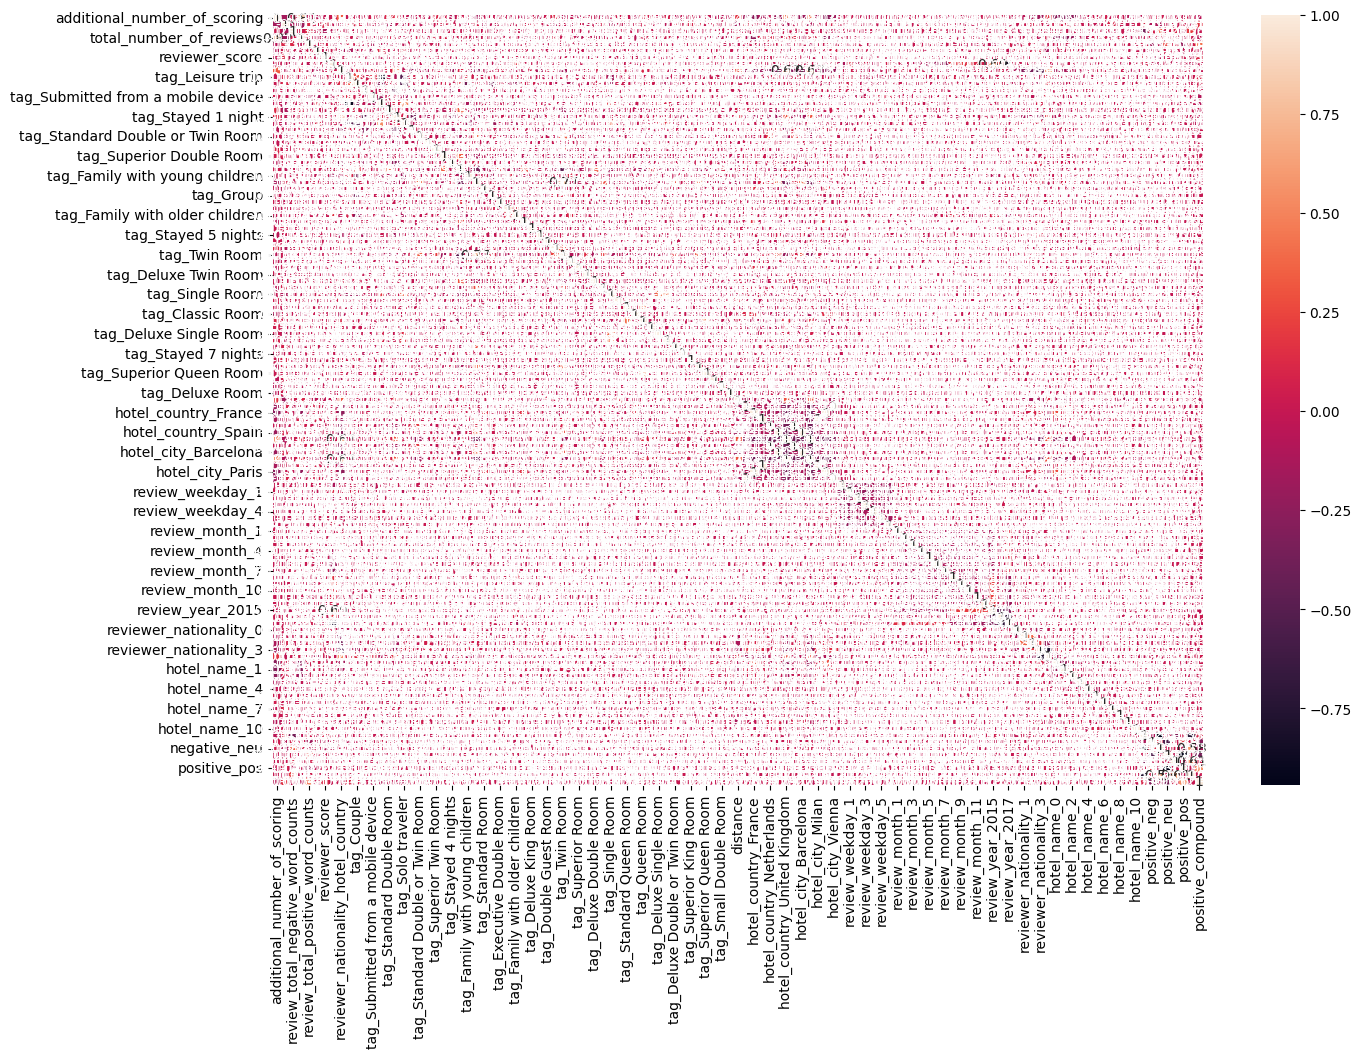

In [66]:
# Визуализируем тепловой картой корреляцию между всеми числовыми признаками датасета: 
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df_v3.drop(['sample'], axis=1).corr(numeric_only=True), annot=True)

> Матрица корреляции позволяет выбрать признаки для удаления. Признаков много; визуализируем только те признаки, которые были исходно в датасете (первые 17 признаков) и для которых коэффициент корреляции >=0,7 и <1,0. Для этого построим тепловую карту библиотеки plotly.

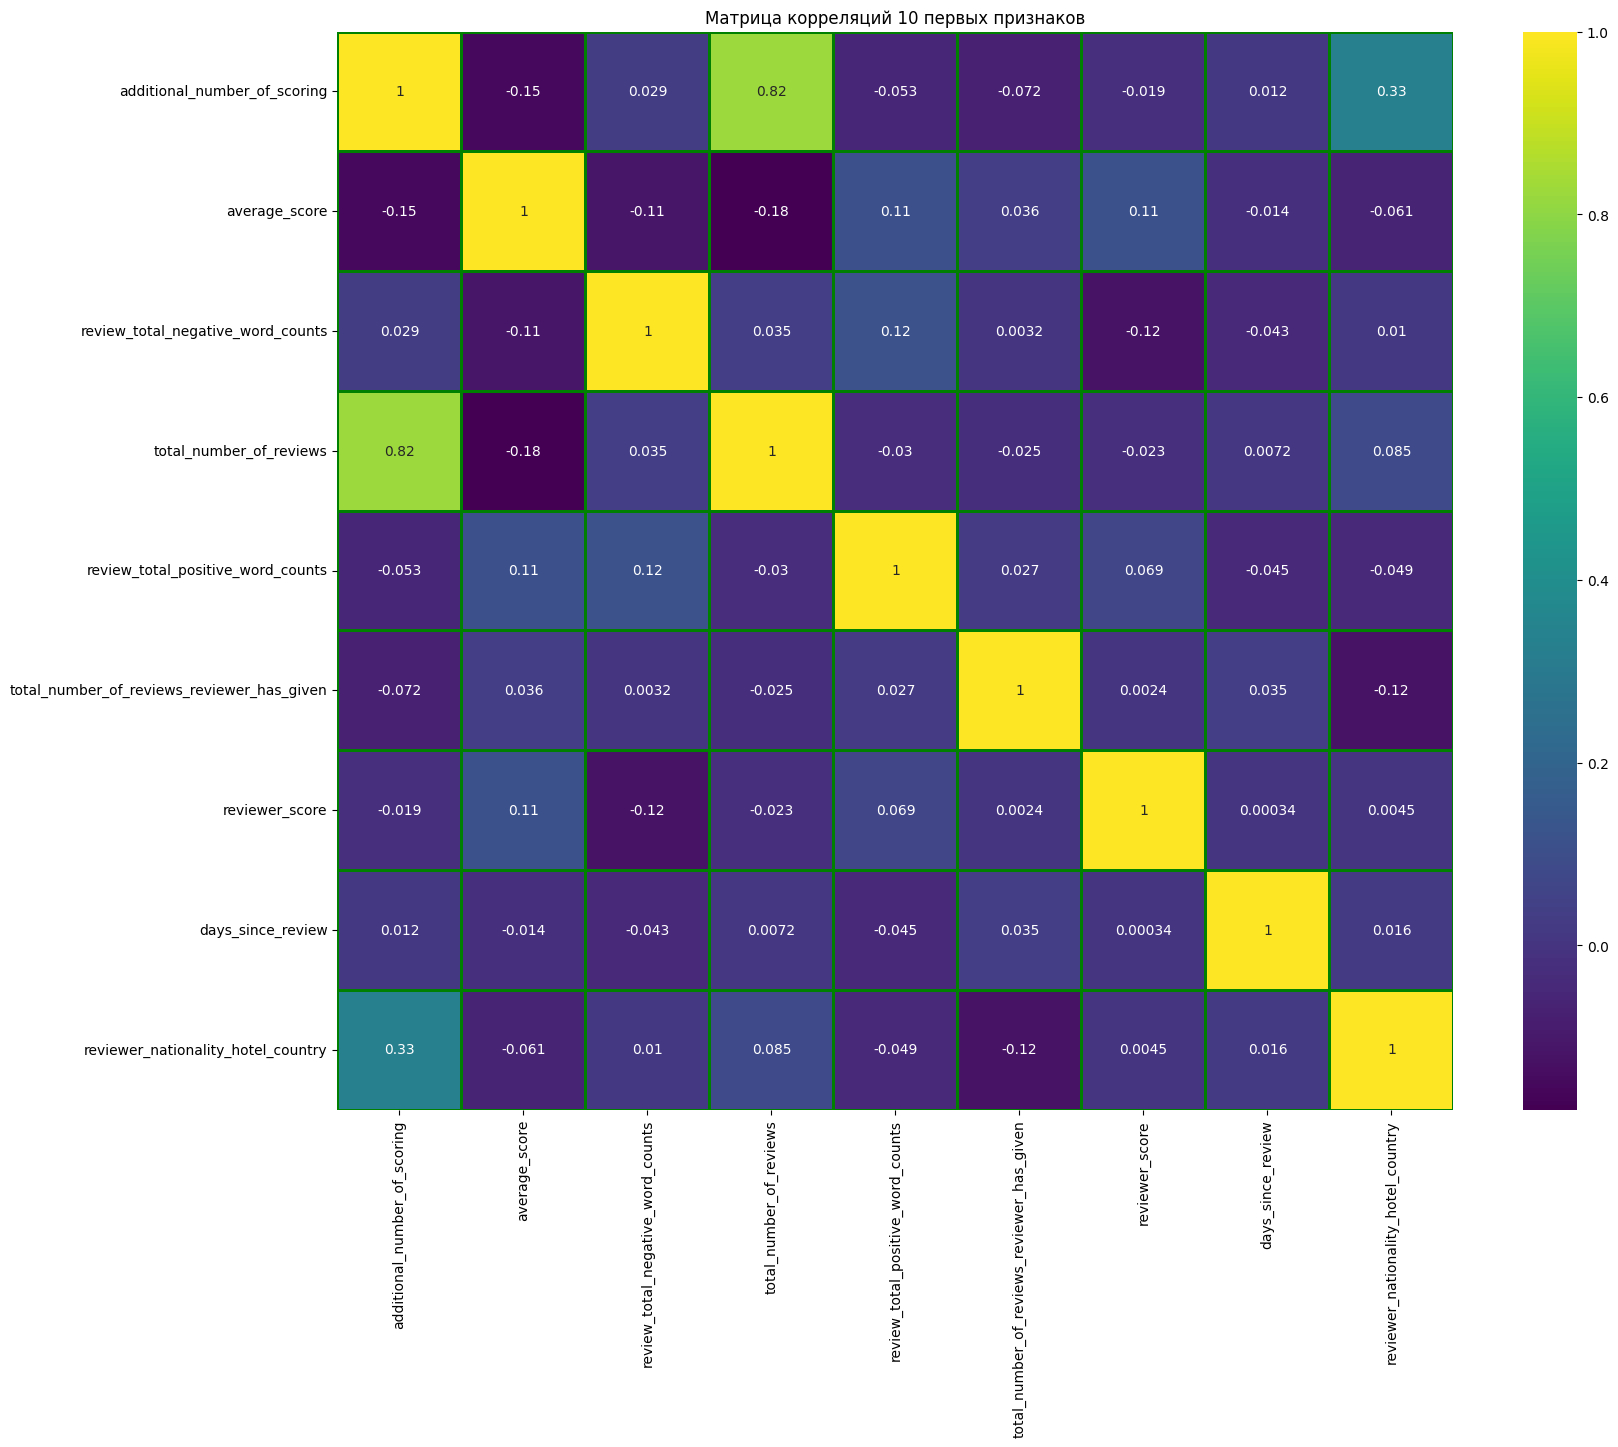

In [68]:
# Составим список из 10 первых признаков
col_list = df_v3.columns[:10]

# Построим матрицу корреляции по отобранным признакам
# удалим признак sample до построения тепловой карты:
col_list = col_list.drop(['sample'])

fig = plt.figure(figsize=(18, 14))
sns.heatmap(df_v3[col_list].corr(),
            annot=True, fmt='.2g',
            cmap='viridis',
            linewidths=2,
            linecolor='green')
plt.title('Матрица корреляций 10 первых признаков');

> Два признака additional_number_of_scoring и total_number_of_reviews показывают сильную положительную связь. Один из признаков удаляем - additional_number_of_scoring.

In [69]:
df_v3 = df_v3.drop('additional_number_of_scoring', axis=1)

In [70]:
# проверка на мультиколлинеарность
# корреляция признаков (оставляем только сильную связь для наглядности)
pivot = df_v3.corr(numeric_only=True).round(3)
pivot = pivot.drop(['sample', 'reviewer_score'], axis=0)
pivot = pivot.drop(['sample', 'reviewer_score'], axis=1)

for col in pivot:
    pivot[col] = pivot[col].apply(lambda x: np.nan if (abs(x) < 0.70 or x == 1) else x)
# for col in pivot:
#     pivot = pivot.dropna(how='all')
#     pivot = pivot.dropna(how='all', axis='columns')

fig = px.imshow(pivot,
                text_auto=True,
                height=700,
                color_continuous_scale='balance',
                aspect="auto",
                zmin=-1,
                zmax=1
                )

fig.show()

> Тепловая карта вновь отображает признаки (7 пар), показывающие сильную взаимную корреляцию (0,7-1 не включая 1). Из каждой пары удалим следующие признаки:
- review_year_2017
- tag_Business trip
- tag_Twin Room
- reviewer_nationality_4
- negative_neu
- positive_neu

> Пару negative_neg - negative_compound имеющую коэффициент корреляции 0,739 оставим в датасете.

In [71]:
# Удалим признаки, показавшие сильную корреляцию на тепловой карте, из датасета:
cols_drop = ['review_year_2017', 'tag_Business trip', 'tag_Twin Room',
             'reviewer_nationality_4', 'negative_neu', 'positive_neu']

df_v3 = df_v3.drop(cols_drop, axis = 1)

In [72]:
# Выведем отдельно пары признаков с коэффициентом корреляции +/-0.6
corr = df_v3.drop(['sample'], axis=1).corr().abs().unstack().reset_index()
corr = corr.rename(columns = {'level_0' : 'sign_1', 'level_1' : 'sign_2', 0 : 'correlation' }).\
     sort_values(by = 'correlation', ascending = False)
corr[(corr['sign_1'] != corr['sign_2']) & (corr['correlation'] > 0.6)]

sign_1                              sign_2  \
6227                hotel_country_Austria                   hotel_city_Vienna   
6336                 hotel_country_France                    hotel_city_Paris   
6445                  hotel_country_Italy                    hotel_city_Milan   
6552            hotel_country_Netherlands                hotel_city_Amsterdam   
6663                  hotel_country_Spain                hotel_city_Barcelona   
6774         hotel_country_United Kingdom                   hotel_city_London   
6879                 hotel_city_Amsterdam           hotel_country_Netherlands   
6990                 hotel_city_Barcelona                 hotel_country_Spain   
7101                    hotel_city_London        hotel_country_United Kingdom   
7208                     hotel_city_Milan                 hotel_country_Italy   
7317                     hotel_city_Paris                hotel_country_France   
7426                    hotel_city_Vienna               hotel_country_Austria   
11984                   negative_compound                        negative_neg   
11548                        negative_neg                   negative_compound   
747                     days_since_review                    review_year_2015   
9576                     review_year_2015                   days_since_review   
834    reviewer_nationality_hotel_country                   hotel_city_London   
7047                    hotel_city_London  reviewer_nationality_hotel_country   
831    reviewer_nationality_hotel_country        hotel_country_United Kingdom   
6717         hotel_country_United Kingdom  reviewer_nationality_hotel_country   
11986                   negative_compound                        negative_pos   
11768                        negative_pos                   negative_compound   

       correlation  
6227      1.000000  
6336      1.000000  
6445      1.000000  
6552      1.000000  
6663      1.000000  
6774      1.000000  
6879      1.000000  
6990      1.000000  
7101      1.000000  
7208      1.000000  
7317      1.000000  
7426      1.000000  
11984     0.739397  
11548     0.739397  
747       0.689217  
9576      0.689217  
834       0.665273  
7047      0.665273  
831       0.665273  
6717      0.665273  
11986     0.605048  
11768     0.605048

> Признаки, определяющие страну отеля и город расположения отеля имеют корреляцию равную 1. Эти же признаки сильно взаимосвязаны с координатами. Так же имеется пара признаков коррелирующая между собой с коэффициентом 0,689:
- 'year_2015' и 'days_since_review'
- 'hotel_country_United Kingdom'
- 'hotel_country_Spain'
- 'hotel_country_France'
- 'hotel_country_Netherlands'
- 'hotel_country_Austria'
- 'hotel_country_Italy'

In [73]:
# Произведём удаление признаков с сильной корреляцией
cols_drop = ['hotel_country_United Kingdom', 'hotel_country_Spain',
             'hotel_country_France', 'hotel_country_Netherlands',
             'hotel_country_Austria', 'hotel_country_Italy', 'review_year_2015']

df_v3 = df_v3.drop(cols_drop, axis = 1)

In [74]:
# проверяем структуру датасета:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Columns: 104 entries, average_score to positive_compound
dtypes: float64(9), int64(95)
memory usage: 409.2 MB


> Количество признаков уменьшено до 104. Проведем отбор наиболее значимых признаков (15-20), которые будем далее использовать для построения модели. Используем для этого статистические тесты:
- ANOVA
- хи-квадрат.

Однако, в датасете, на котором выполняется анализ мультколлинеарности, уже нет категориальных признаков. Категориальные признаки были в датасете до кодирования.

В связи с этим выполним два теста хи-квадрат:
- для исходных признаков, не нормализованных
- для признаков, созданных в датасете до кодирования.

## 7. ОТБОР ПРИЗНАКОВ НА ОСНОВЕ ИХ ВАЖНОСТИ

In [89]:
# Выделяем признаки созданные на этапе EDA:
col_features_list = df_v3.columns[10:]

In [90]:
# Разделим признаки на непрерывные и категориальные
# Непрерывные признаки исходного датасета:
num_cols = [
    'average_score',
    'review_total_negative_word_counts',
    'review_total_positive_word_counts',
    'total_number_of_reviews',
    'total_number_of_reviews_reviewer_has_given',
    'days_since_review'
]

# Сгенерированные признаки:
cat_cols = col_features_list

In [91]:
# Разделим датасет на учебную и тестовую части
train_data_importance = df_v3.query('sample == 1').drop(['sample'], axis=1)
test_data_importance = df_v3.query('sample == 0').drop(['sample'], axis=1)

y = train_data_importance.reviewer_score.values
X = train_data_importance.drop(['reviewer_score'], axis=1)

In [ ]:
# Для оценки значимости категориальных переменных используем непараметрический тест хи-квадрат.
# Из полученного массива значений хи-квадрат и p-value для каждого признака, используем только
# значения хи-квадрат и выведем их на графике
#y = y.astype('int')

#imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
#imp_cat.sort_values(inplace = True)
#imp_cat.plot(kind = 'barh', figsize=(30, 30))

<Axes: >

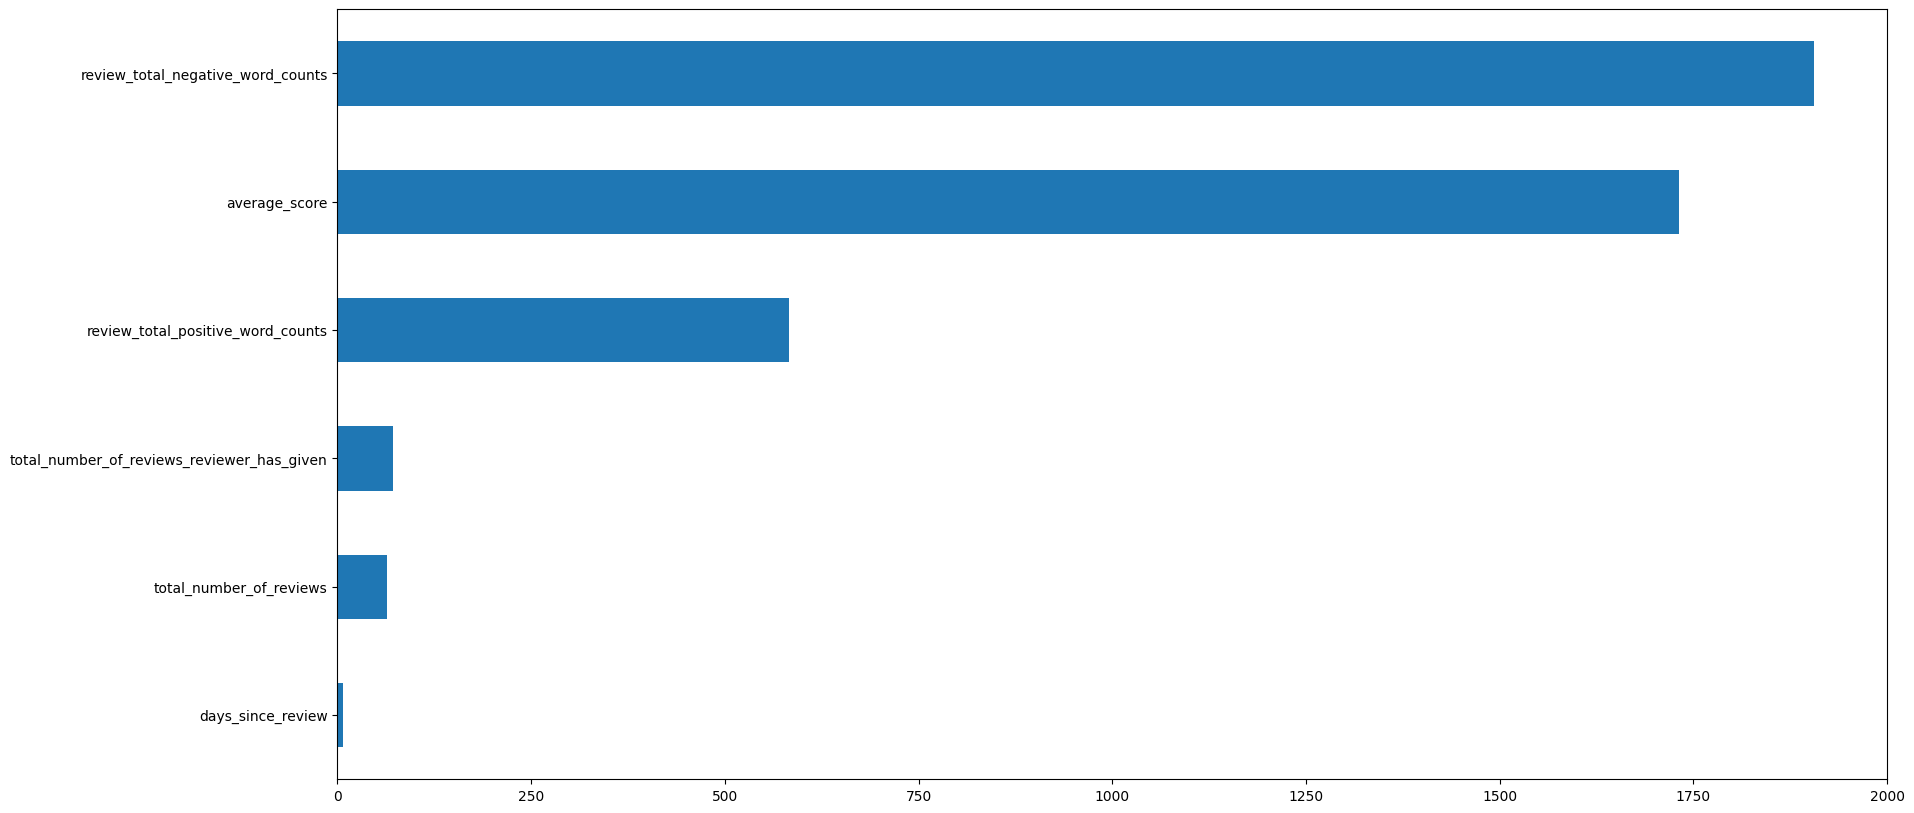

In [92]:
# Для оценки значимости непрерывных переменных используем функцию f_classif из библиотеки sklearn.
# В основе метода оценки значимости переменных лежит анализ ANOVA.
# Метод возвращает двумерный массив f-статистик и p-value для каждого признака.
# В качестве меры значимости используем значение f-статистики.
# Признаки - Непрерывные признаки исходного датасета:

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh', figsize=(20, 10))

In [93]:
imp_num[::-1] # отображаем значения коэффициентов значимости непрерывных признаков

review_total_negative_word_counts             1905.139738
average_score                                 1731.272021
review_total_positive_word_counts              582.528266
total_number_of_reviews_reviewer_has_given      71.592123
total_number_of_reviews                         63.522185
days_since_review                                7.407201
dtype: float64

> Отбираем пять признаков с коэффициентом более 60:
- 'average_score'
- 'review_total_positive_word_counts'
- 'review_total_negative_word_counts'
- 'total_number_of_reviews_reviewer_has_given'
- 'total_number_of_reviews'

<Axes: >

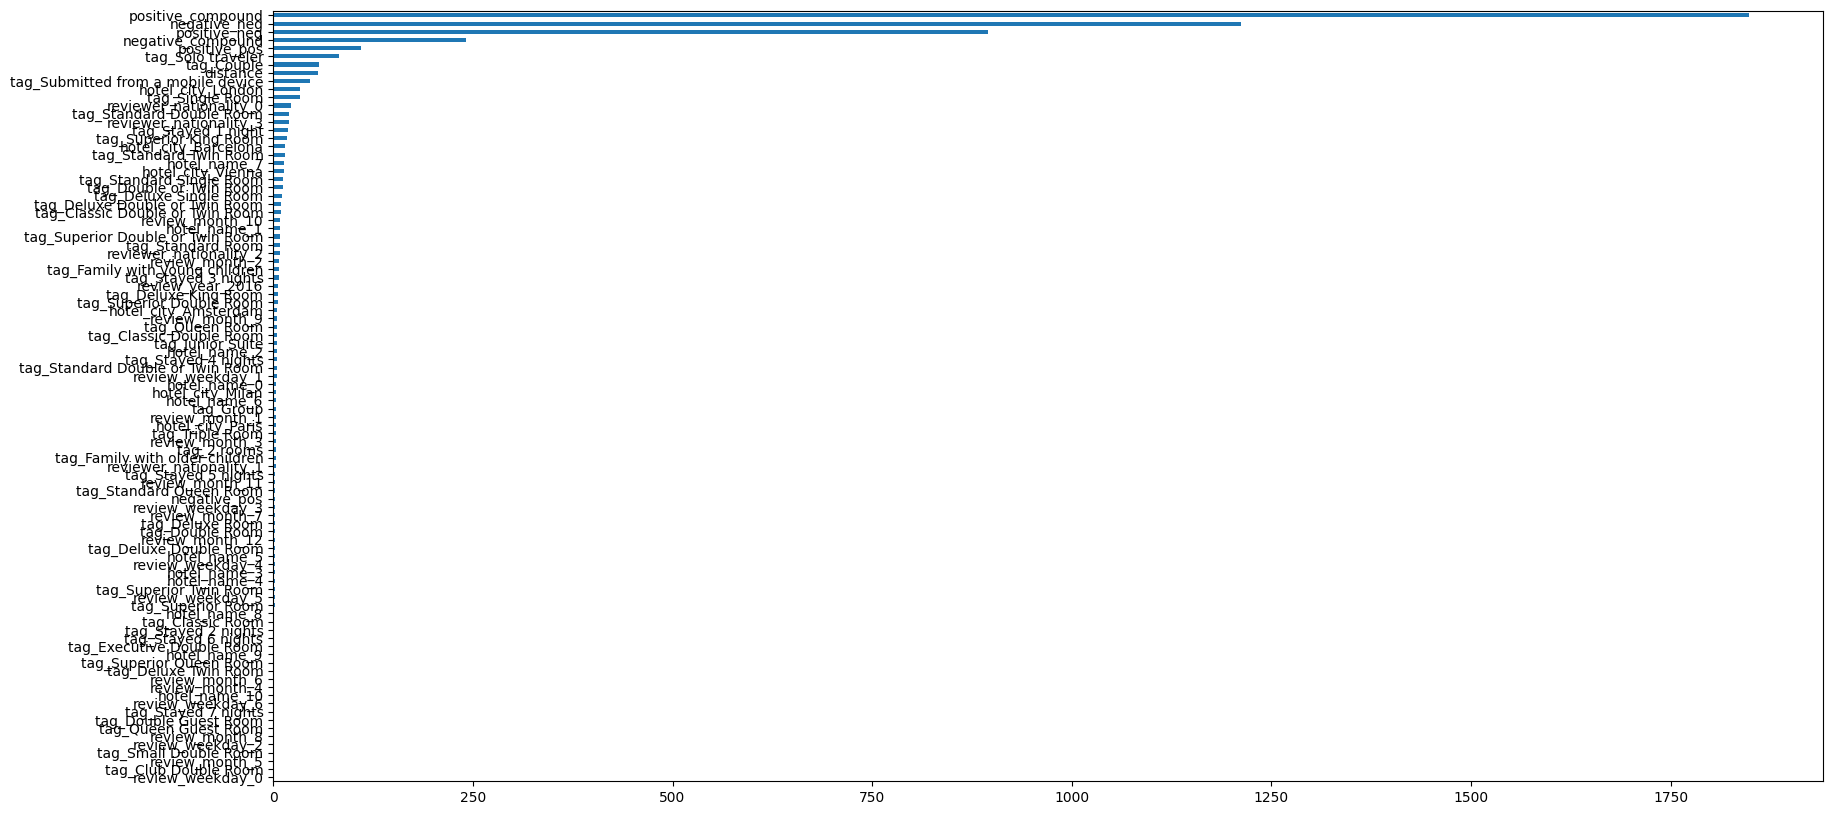

In [94]:
# Для оценки значимости непрерывных переменных, сгенерированных после их создания,
# используем функцию f_classif из библиотеки sklearn.
# В основе метода оценки значимости переменных лежит анализ ANOVA.
# Метод возвращает двумерный массив f-статистик и p-value для каждого признака.
# В качестве меры значимости используем значение f-статистики.
# Признаки - Сгенерированные признаки:

imp_num = pd.Series(f_classif(X[cat_cols], y)[0], index = cat_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh', figsize=(20, 10))

> Результаты не читабельные; выделим первые 15 признаков с максимальным коэффициентом и повторим тест ANOVA.

In [95]:
imp_num = pd.Series(f_classif(X[cat_cols], y)[0], index = cat_cols)
imp_num.sort_values(inplace = True)
imp_num[94:78: -1] # отображаем 15 признаков по уменьшению коэффициента

positive_compound                     1848.534088
negative_neg                          1211.904043
positive_neg                           894.757616
negative_compound                      241.789594
positive_pos                           109.459108
tag_Solo traveler                       82.962248
tag_Couple                              56.833984
distance                                56.514608
tag_Submitted from a mobile device      46.091042
hotel_city_London                       33.850739
tag_Single Room                         33.688247
reviewer_nationality_0                  22.068615
tag_Standard Double Room                19.919816
reviewer_nationality_3                  19.919550
tag_Stayed 1 night                      18.001856
dtype: float64

<Axes: >

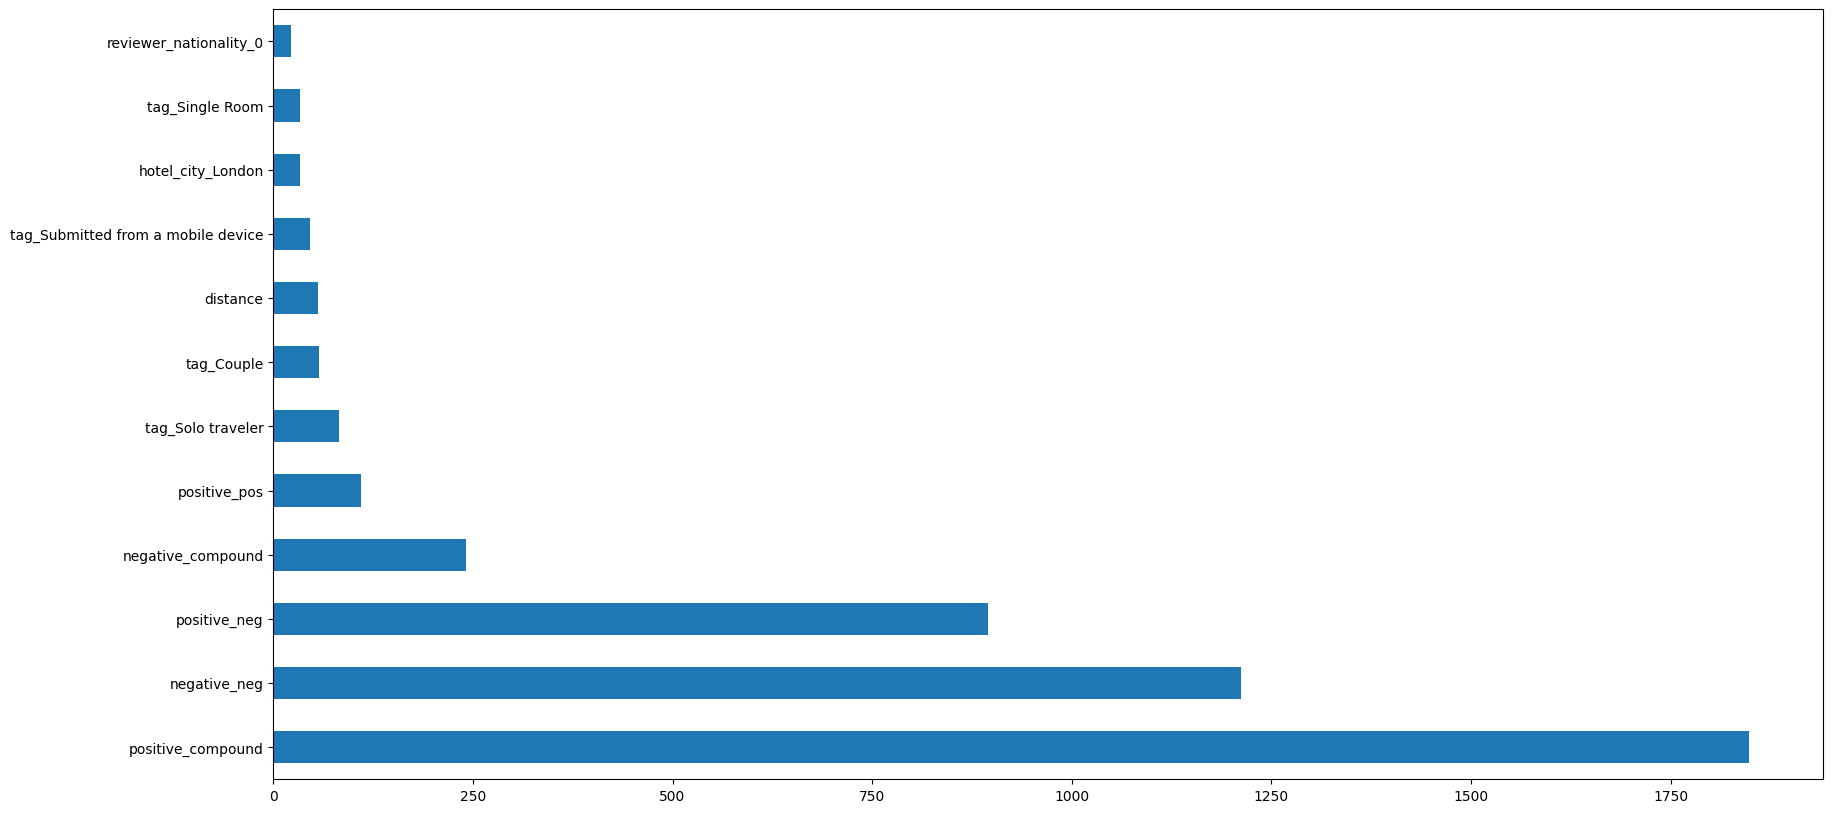

In [96]:
imp_num = pd.Series(f_classif(X[cat_cols], y)[0], index = cat_cols)
imp_num.sort_values(inplace = True)
imp_num[94:81: -1].plot(kind = 'barh', figsize=(20, 10)) # отображаем 12 признаков с значимостью более 20

> Признаки с коэффициентом менее 20 считаем слабыми и не отбираем для модели. Таким образом, отбираем 5 + 12 признаков = 17 признаков.
> 
> Посмотрим на значимость признаков, если анализировать все признаки датасета не разделяя из на непрерывные и сгенерированные:

In [99]:
cols_features_list = df_v3.columns[:]
#удаляем целевой признак и признак для разделения датасета на обучающий и тестовый
cols_features_list = cols_features_list.drop(['sample', 'reviewer_score'])

imp_num = pd.Series(f_classif(X[cols_features_list], y)[0], index = cols_features_list)
imp_num.sort_values(inplace = True)
imp_num[104:82: -1] # отображаем 19 признаков по уменьшению коэффициента

review_total_negative_word_counts             1905.139738
positive_compound                             1848.534088
average_score                                 1731.272021
negative_neg                                  1211.904043
positive_neg                                   894.757616
review_total_positive_word_counts              582.528266
negative_compound                              241.789594
tag_Leisure trip                               155.854409
positive_pos                                   109.459108
tag_Solo traveler                               82.962248
total_number_of_reviews_reviewer_has_given      71.592123
total_number_of_reviews                         63.522185
tag_Couple                                      56.833984
distance                                        56.514608
tag_Submitted from a mobile device              46.091042
hotel_city_London                               33.850739
tag_Single Room                                 33.688247
reviewer_natio

<Axes: >

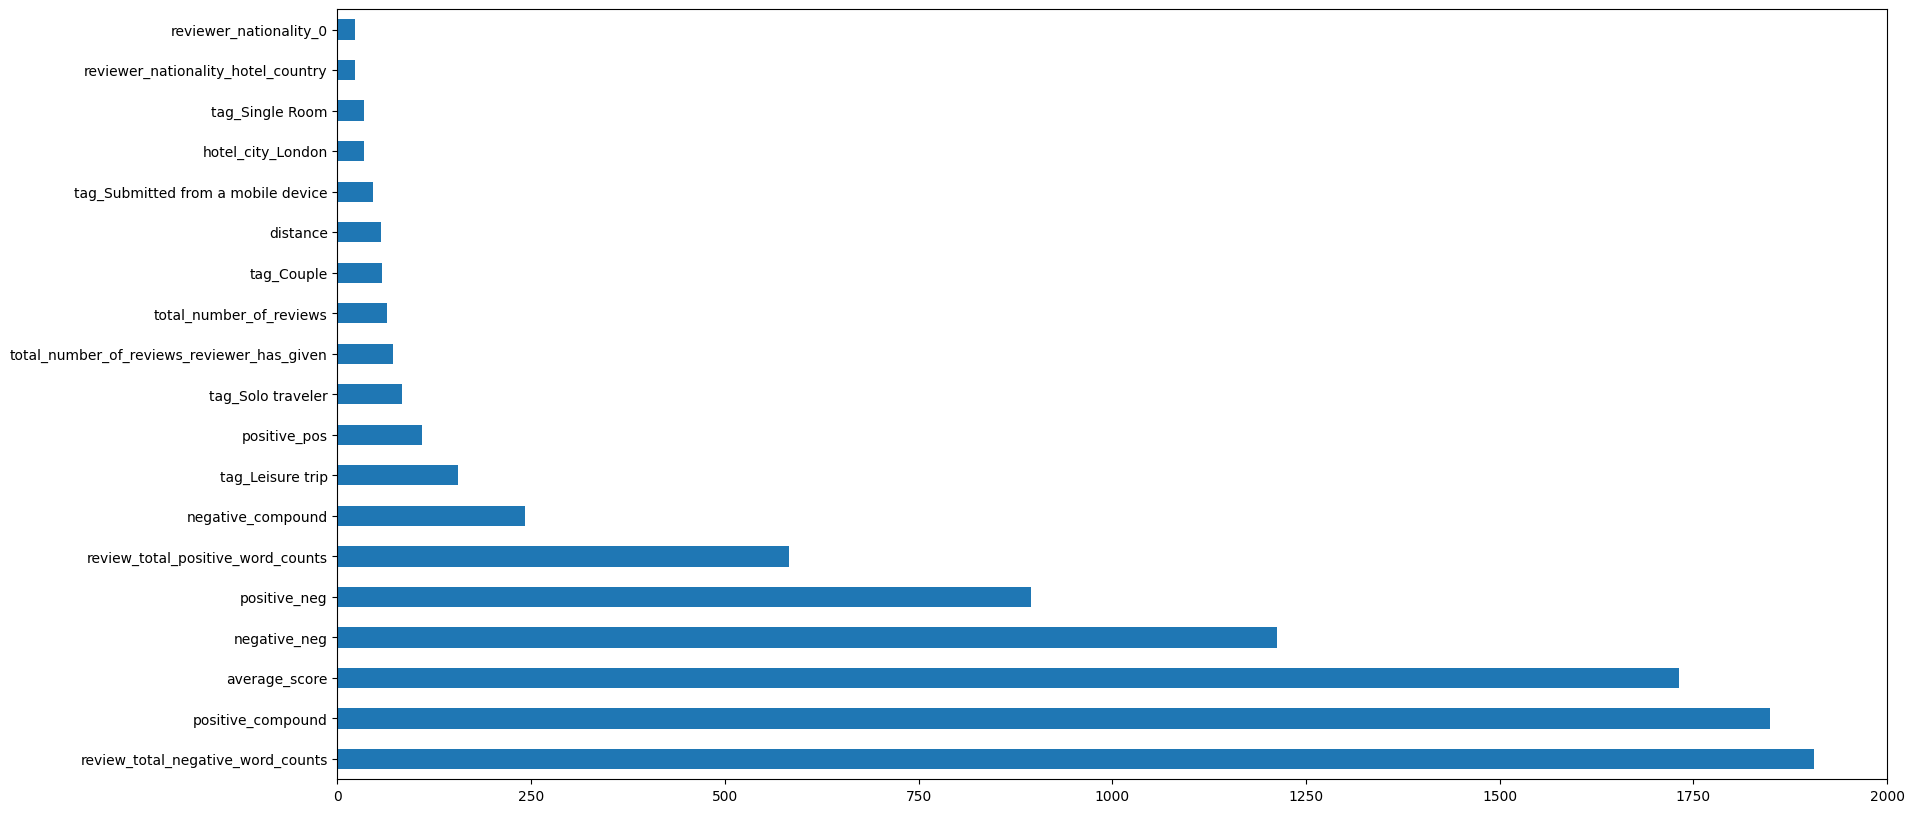

In [100]:
cols_features_list = df_v3.columns[:]
cols_features_list = cols_features_list.drop(['sample', 'reviewer_score'])

imp_num = pd.Series(f_classif(X[cols_features_list], y)[0], index = cols_features_list)
imp_num.sort_values(inplace = True)
imp_num[104:82: -1].plot(kind = 'barh', figsize=(20, 10)) # отображаем 19 признаков с значимостью более 20

In [ ]:
# Формируем новый датасет из наиболее значимых 18 признаков, имеющих значимость более 90:
# Будем использовать данный датасет для построения модели:
#cols_for_model = imp_num[104:83: -1].index
#df_for_model = df_v3.loc[:, cols_for_model]

# Добавим в созданный датасет еще два признака: sample, reviewer_score из закодированного датасета:
#cols_df_v3 = ['sample', 'reviewer_score', 'review_total_negative_word_counts']
#df_v3_for_model = df_v3.loc[:, cols_df_v3]

In [102]:
cols_for_model = imp_num[104:82: -1].index
cols_df_v3 = ['sample', 'reviewer_score']

In [111]:
type(list(cols_for_model))

list

In [117]:
a = list(cols_for_model)+cols_df_v3
type(a)

list

In [122]:
# Формируем новый датасет из наиболее значимых 18 признаков
# Будем использовать данный датасет для построения модели
# Добавим nfr;t в датасет еще два признака: sample, reviewer_score из закодированного датасета:
cols_for_model = list(imp_num[104:82: -1].index)
cols_df_v3 = ['sample', 'reviewer_score']

df_for_model = df_v3.loc[:, cols_for_model+cols_df_v3]
df_for_model.sample(3)

review_total_negative_word_counts  positive_compound  average_score  \
240504                                 13             0.7964            8.7   
270214                                  7             0.5994            9.1   
508377                                 67             0.9294            8.8   

        negative_neg  positive_neg  review_total_positive_word_counts  \
240504         0.000           0.0                                 34   
270214         0.474           0.0                                  3   
508377         0.069           0.0                                 21   

        negative_compound  tag_Leisure trip  positive_pos  tag_Solo traveler  \
240504             0.3089                 1         0.197                  0   
270214            -0.4019                 1         0.796                  0   
508377            -0.2732                 1         0.478                  0   

        ...  total_number_of_reviews  tag_Couple  distance  \
240504  ...                    12158           1       1.1   
270214  ...                     4687           1       0.4   
508377  ...                      390           1       2.9   

        tag_Submitted from a mobile device  hotel_city_London  \
240504                                   0                  1   
270214                                   1                  0   
508377                                   1                  1   

        tag_Single Room  reviewer_nationality_hotel_country  \
240504                0                                   1   
270214                0                                   0   
508377                0                                   1   

        reviewer_nationality_0  sample  reviewer_score  
240504                       0       1            10.0  
270214                       0       1            10.0  
508377                       0       0             0.0  

[3 rows x 21 columns]

In [123]:
# Проверяем структуру датасета для построения модели:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 21 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   review_total_negative_word_counts           515738 non-null  int64  
 1   positive_compound                           515738 non-null  float64
 2   average_score                               515738 non-null  float64
 3   negative_neg                                515738 non-null  float64
 4   positive_neg                                515738 non-null  float64
 5   review_total_positive_word_counts           515738 non-null  int64  
 6   negative_compound                           515738 non-null  float64
 7   tag_Leisure trip                            515738 non-null  int64  
 8   positive_pos                                515738 non-null  float64
 9   tag_Solo traveler                           515738 non-null  int64  
 

In [124]:
# Резервная копия датасета для построения модели:
df_for_model_copy = df_for_model.copy()

In [144]:
df_for_model = df_for_model_copy.copy()

## 8. НОРМАЛИЗАЦИЯ ДАННЫХ

Числовые признаки для нормализации:
- признак average_score 
- признак review_total_negative_word_counts
- признак review_total_positive_word_counts
- признак total_number_of_reviews 
- признак total_number_of_reviews_reviewer_has_given

Добавим еще один признак для нормализации:
- distance

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

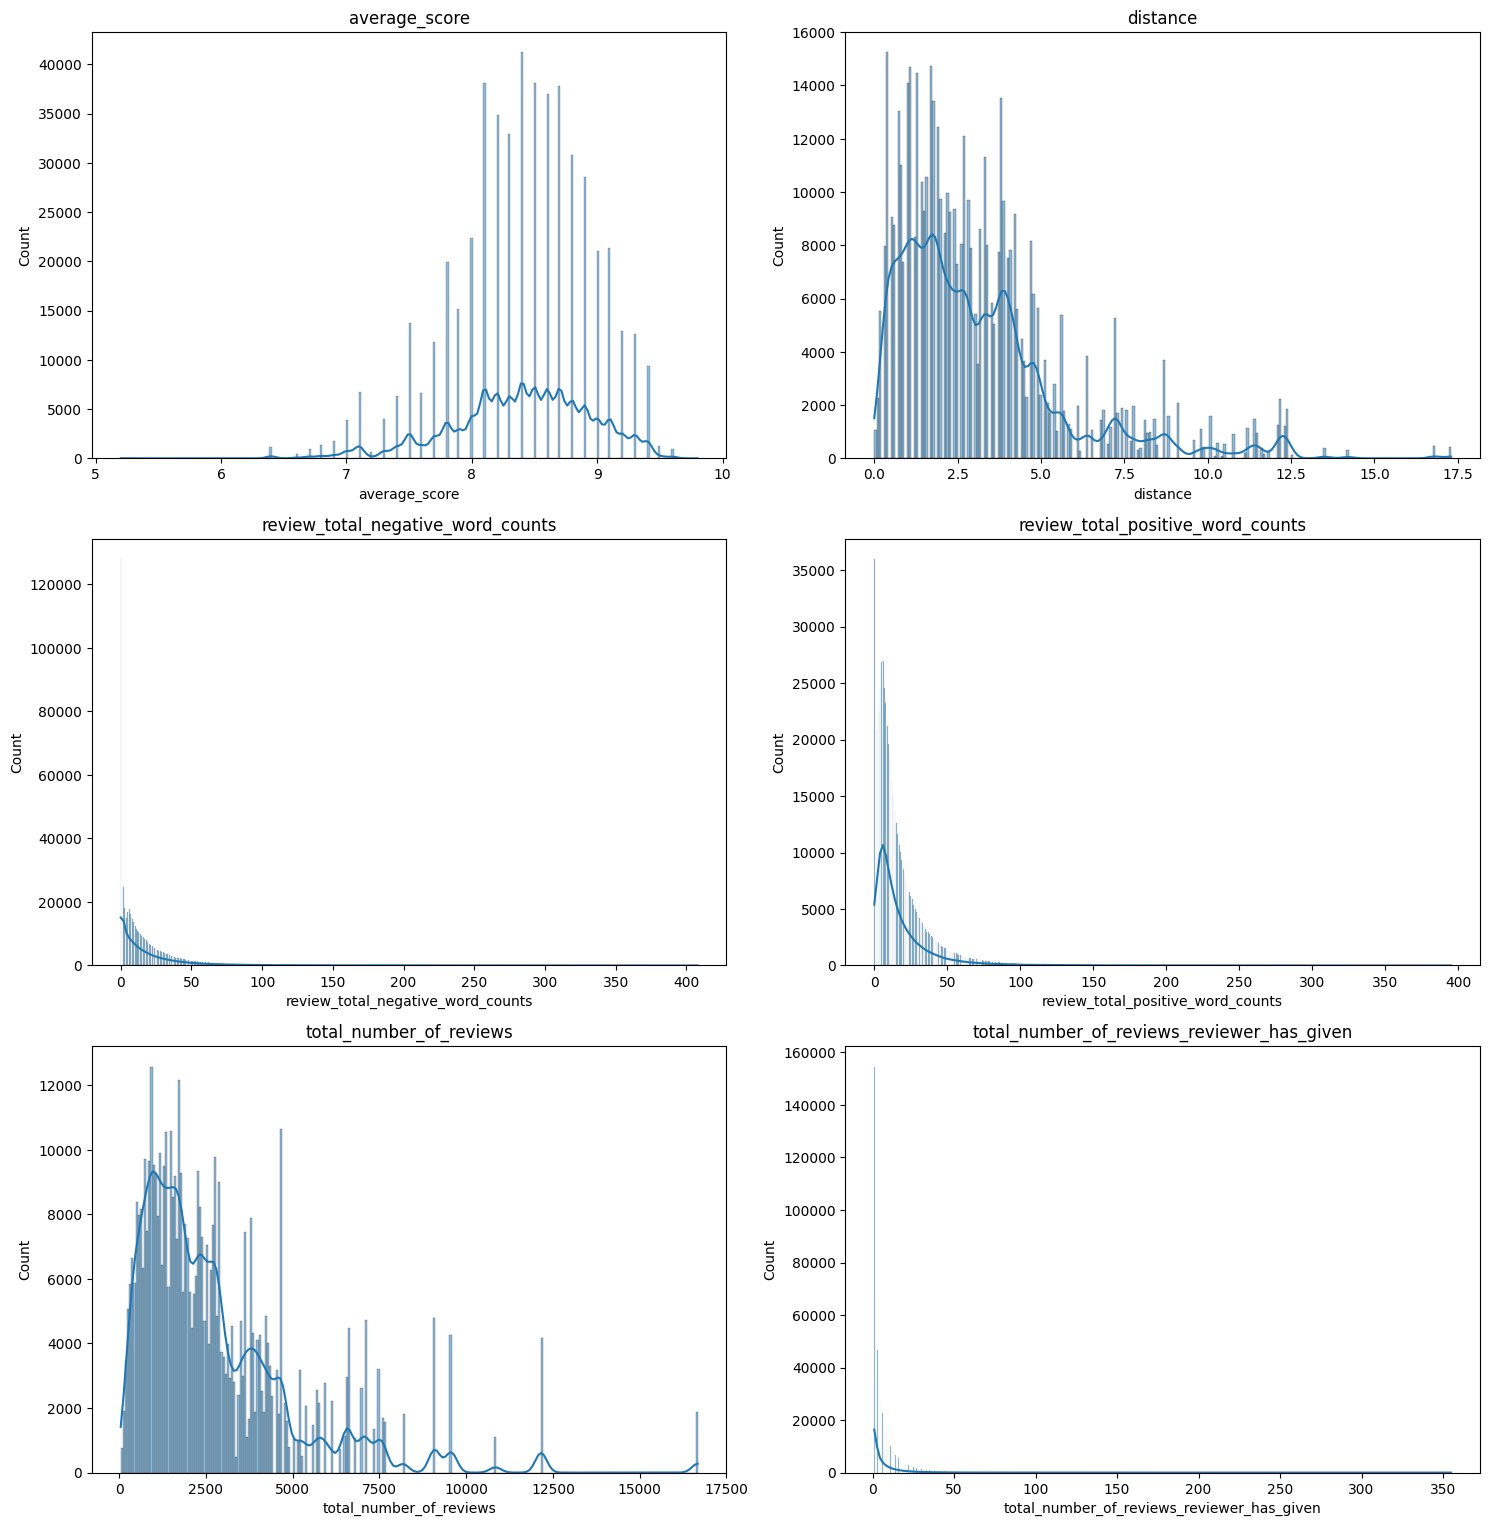

In [146]:
# Список признаков, которые будем нормализовать
cols = ['average_score', 'distance',
        'review_total_negative_word_counts', 'review_total_positive_word_counts',
        'total_number_of_reviews', 'total_number_of_reviews_reviewer_has_given']

# Построим гистограммы с графиком плотности ядра для каждого признака
try:
    plt.figure(figsize=(15, 20))
    for i, col in enumerate(df_for_model[cols]):
        ax = plt.subplot(4, 2, i+1)
        sns.histplot(df_for_model, x=cols[i], kde=True)
        plt.title(cols[i])
        plt.tight_layout()
except: ValueError
    
plt.show();

Признак "average_score" имеет распределение близкое к нормальному. У остальных признаков распеределение значений смещено к 0 - левостороннее смещение. Проведем нормализацию признаков, используя Robustscaler - на этапе EDA из датасета не удалялись выбросы.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

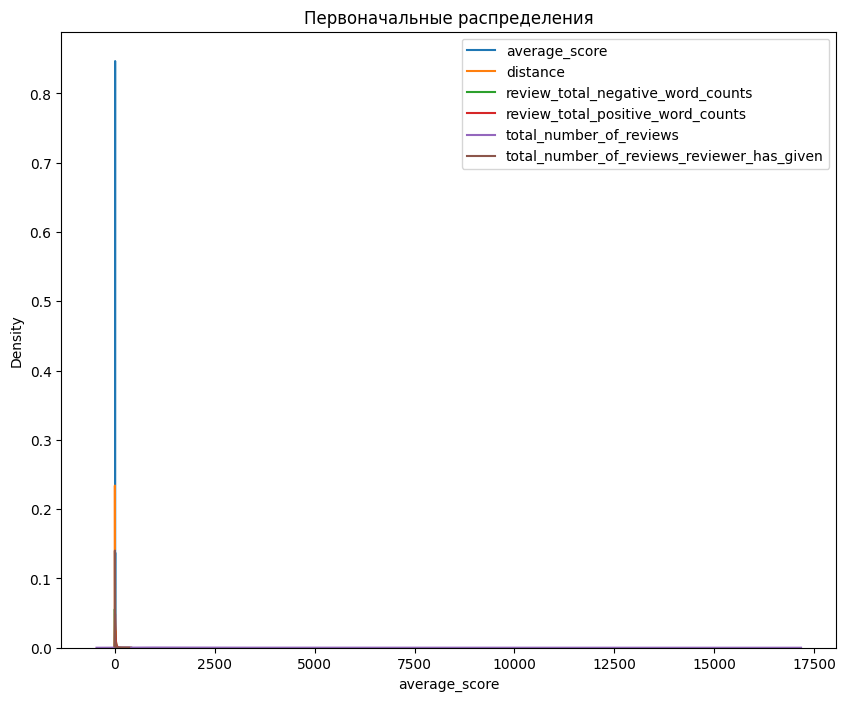

In [136]:
# Визуализируем признаки для нормализации несколько в ином виде:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Первоначальные распределения')

cols = ['average_score', 'distance',
        'review_total_negative_word_counts', 'review_total_positive_word_counts',
        'total_number_of_reviews', 'total_number_of_reviews_reviewer_has_given']

# Для построения графика используем метод визуализации kdeplot()
sns.kdeplot(df_for_model['average_score'], ax=ax1, label='average_score')
sns.kdeplot(df_for_model['distance'], ax=ax1, label='distance')
sns.kdeplot(df_for_model['review_total_negative_word_counts'], ax=ax1, label='review_total_negative_word_counts')
sns.kdeplot(df_for_model['review_total_positive_word_counts'], ax=ax1, label='review_total_positive_word_counts')
sns.kdeplot(df_for_model['total_number_of_reviews'], ax=ax1, label='total_number_of_reviews')
sns.kdeplot(df_for_model['total_number_of_reviews_reviewer_has_given'], ax=ax1, label='total_number_of_reviews_reviewer_has_given')
plt.legend()

In [147]:
# Выведем описательную статистику проверяемых признаков
df_for_model[cols].describe()

average_score       distance  review_total_negative_word_counts  \
count  515738.000000  515738.000000                      515738.000000   
mean        8.397487       3.157037                          18.539450   
std         0.548048       2.569922                          29.690831   
min         5.200000       0.000000                           0.000000   
25%         8.100000       1.300000                           2.000000   
50%         8.400000       2.600000                           9.000000   
75%         8.800000       4.100000                          23.000000   
max         9.800000      17.300000                         408.000000   

       review_total_positive_word_counts  total_number_of_reviews  \
count                      515738.000000            515738.000000   
mean                           17.776458              2743.743944   
std                            21.804185              2317.464868   
min                             0.000000                43.000000   
25%                             5.000000              1161.000000   
50%                            11.000000              2134.000000   
75%                            22.000000              3613.000000   
max                           395.000000             16670.000000   

       total_number_of_reviews_reviewer_has_given  
count                               515738.000000  
mean                                     7.166001  
std                                     11.040228  
min                                      1.000000  
25%                                      1.000000  
50%                                      3.000000  
75%                                      8.000000  
max                                    355.000000

> Диапазоны значений каждого признака различны; нет нормального распределения, за исключением, признака 'average_score'

In [148]:
r_scaler = preprocessing.RobustScaler()
df_for_model[cols] = r_scaler.fit_transform(df_for_model[cols])

In [149]:
# Проверяем структуру датасета после нормализации:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 21 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   review_total_negative_word_counts           515738 non-null  float64
 1   positive_compound                           515738 non-null  float64
 2   average_score                               515738 non-null  float64
 3   negative_neg                                515738 non-null  float64
 4   positive_neg                                515738 non-null  float64
 5   review_total_positive_word_counts           515738 non-null  float64
 6   negative_compound                           515738 non-null  float64
 7   tag_Leisure trip                            515738 non-null  int64  
 8   positive_pos                                515738 non-null  float64
 9   tag_Solo traveler                           515738 non-null  int64  
 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

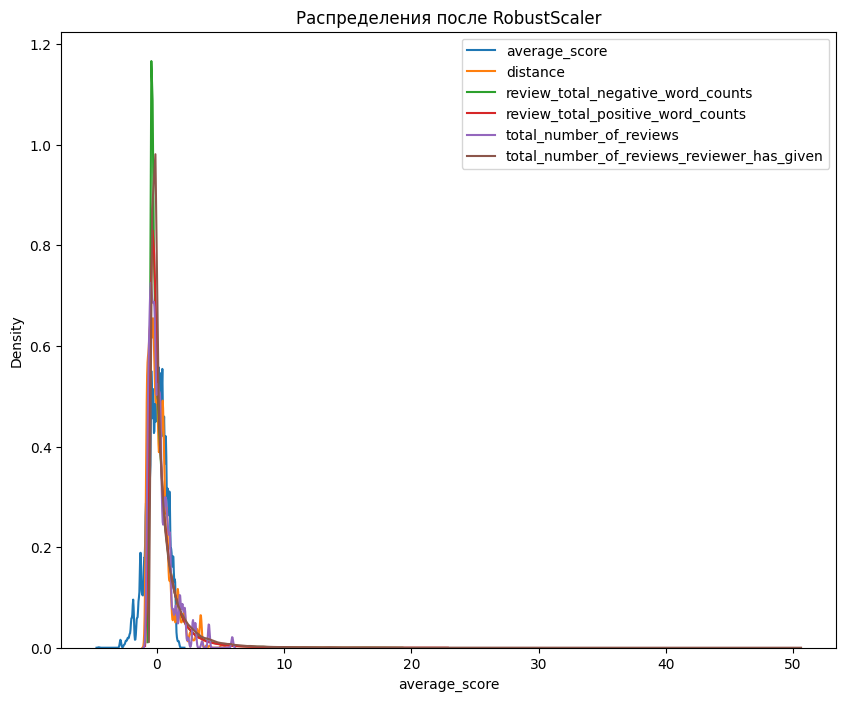

In [150]:
# Визуализируем распределения после нормализации признаков
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_for_model['average_score'], ax=ax1, label='average_score')
sns.kdeplot(df_for_model['distance'], ax=ax1, label='distance')
sns.kdeplot(df_for_model['review_total_negative_word_counts'], ax=ax1, label='review_total_negative_word_counts')
sns.kdeplot(df_for_model['review_total_positive_word_counts'], ax=ax1, label='review_total_positive_word_counts')
sns.kdeplot(df_for_model['total_number_of_reviews'], ax=ax1, label='total_number_of_reviews')
sns.kdeplot(df_for_model['total_number_of_reviews_reviewer_has_given'], ax=ax1, label='total_number_of_reviews_reviewer_has_given')
plt.legend()

In [151]:
# Выведем описательную статистику нормализованных признаков
df_for_model[cols].describe()

average_score       distance  review_total_negative_word_counts  \
count  515738.000000  515738.000000                      515738.000000   
mean       -0.003590       0.198942                           0.454260   
std         0.782926       0.917829                           1.413849   
min        -4.571429      -0.928571                          -0.428571   
25%        -0.428571      -0.464286                          -0.333333   
50%         0.000000       0.000000                           0.000000   
75%         0.571429       0.535714                           0.666667   
max         2.000000       5.250000                          19.000000   

       review_total_positive_word_counts  total_number_of_reviews  \
count                      515738.000000            515738.000000   
mean                            0.398615                 0.248672   
std                             1.282599                 0.945132   
min                            -0.647059                -0.852773   
25%                            -0.352941                -0.396819   
50%                             0.000000                 0.000000   
75%                             0.647059                 0.603181   
max                            22.588235                 5.928222   

       total_number_of_reviews_reviewer_has_given  
count                               515738.000000  
mean                                     0.595143  
std                                      1.577175  
min                                     -0.285714  
25%                                     -0.285714  
50%                                      0.000000  
75%                                      0.714286  
max                                     50.285714

> После нормализации значения признаков имеют вид более похожий на нормальное распределение

## 9. ОБУЧЕНИЕ И ОЦЕНКА КАЧЕСТВА МОДЕЛИ

In [152]:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 21 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   review_total_negative_word_counts           515738 non-null  float64
 1   positive_compound                           515738 non-null  float64
 2   average_score                               515738 non-null  float64
 3   negative_neg                                515738 non-null  float64
 4   positive_neg                                515738 non-null  float64
 5   review_total_positive_word_counts           515738 non-null  float64
 6   negative_compound                           515738 non-null  float64
 7   tag_Leisure trip                            515738 non-null  int64  
 8   positive_pos                                515738 non-null  float64
 9   tag_Solo traveler                           515738 non-null  int64  
 

In [153]:
# Теперь выделим тестовую часть
train_data = df_for_model.query('sample == 1').drop(['sample'], axis=1)
test_data = df_for_model.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [154]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [155]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 20), (386803, 20), (386803, 19), (309442, 19), (77361, 19))

In [156]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model_3 = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [157]:
# Обучаем модель на тестовом наборе данных
model_3.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model_3.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished


In [166]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred).round(7))
print('MAPE:', (metrics.mean_absolute_percentage_error(y_test, y_pred)*100).round(7), '%')

MAE: 0.8839167
MAPE: 12.6022214 %


<Axes: >

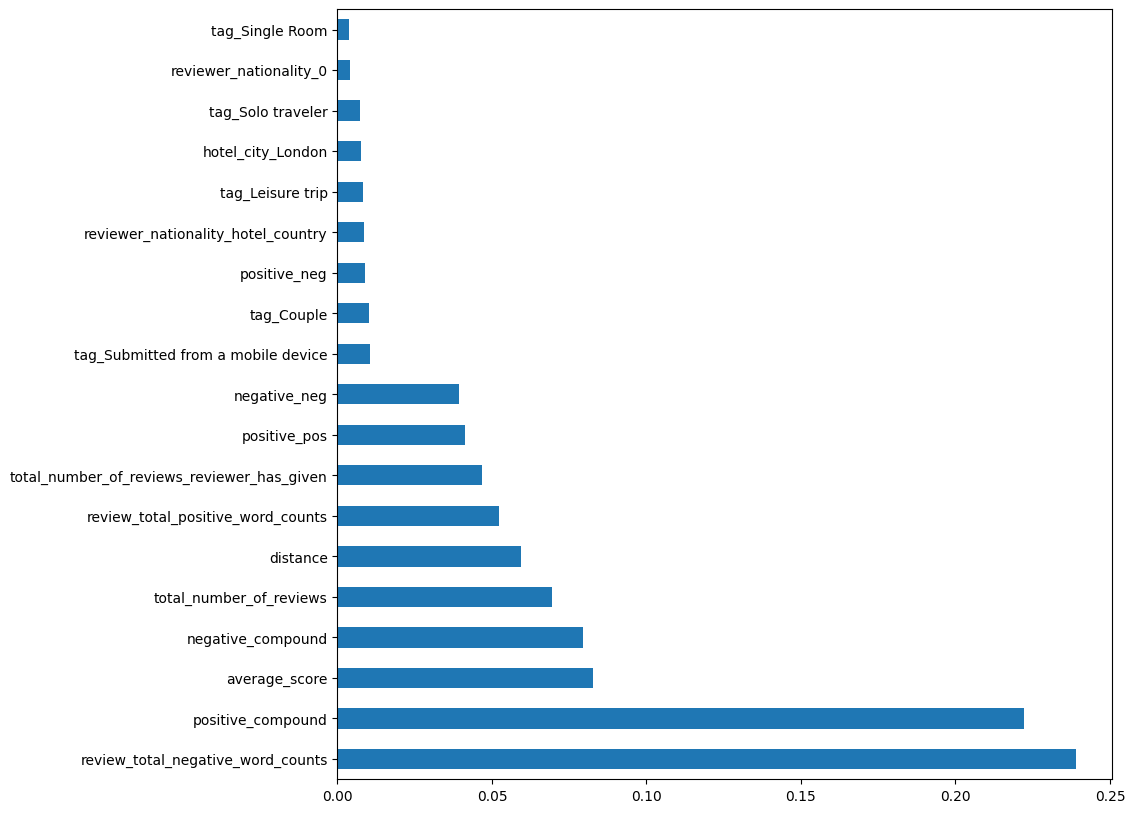

In [168]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model_3.feature_importances_, index=X.columns)
feat_importances.nlargest(19).plot(kind='barh')

> MAPE для третьей версии модели равна 12,602%, что менее 13,5%. Модель получилось улучшить по сравнению с версией 1 и 2
> 
> Гипотеза: для повышения точности модели количество признаков возможно сократить. В качестве порога можно взять значение значимости = 0,05. Признаки с значением значимости >0,05 включаются в датасет для обновления модели. В результате останется 8 признаков из 19 исходных, принятых для построения модели model_3.

In [169]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [ ]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
#object_columns = [s for s in df_v1.columns if df_v2[s].dtypes == 'object']
#df_v2.drop(object_columns, axis = 1, inplace=True)

## 10. ВЫВОДЫ ПО МОДЕЛИ №3 (v3)

1. MAPE для третьей версии модели равна 12,602%, что менее 13,5%. Модель получилось улучшить по сравнению с версией 1 и 2.
2. На лидерборде соревнования в Kaggle - public score = 12.67856.
3. Улучшение модели выполнено за счет:
- очистки данных в исходном датасете и заполнения пропусков, а также исправления неточностей данных (разное написание городов, гостиниц, стран);
- создания новых признаков на основе признаков исходного датасета, в том числе:
  - расстояние между отелем и центром города;
  - название города/страны, полученных из признака адрес отеля;
  - обобщенного признака, сопоставляющего национальность рецензента и страну расположения отеля;
  - новые признаки (месяц, день недели, год) на основе даты;
  - эмоциональные оттенки отзывов и их метрика эмоциональности;
  - новые признаки из тэгов, определяющие тип номера в отели, тип поездки, количество ночей;
- кодирования признаков: непрерывных числовых, номинальных и порядковых категориальных. Для кодировки использован get_dummies() и BinaryEncoder, а также бинарное кодирование с применением lambda();
- удаления малозначемых, неинформативных признаков определенных из анализа мультиколлинеарности, а также проведения теста ANOVA. Тест хи-тест провести не удалось, т.к. после кодирования признаков в датасете не осталось категориальных признаков;
- отбора признаков для построения модели на основе проведения расчет значимости признаков;
- нормализации числовых признаков исходного датасета и числового признака 'distance', полученного на этапе создания новых признаков.
4. Гипотеза: для повышения точности модели количество признаков возможно сократить. В качестве порога можно взять значение значимости = 0,05. Признаки с значением значимости >0,05 включаются в датасет для обновления модели. В результате останется 8 признаков из 19 исходных, принятых для построения модели model_3.

# **ФОРМИРМИРОВАНИЕ ФАЙЛА ДЛЯ САБМИТТА:**

In [170]:
sample_submission

reviewer_score      id
0                    1  488440
1                   10  274649
2                    3  374688
3                   10  404352
4                    9  451596
...                ...     ...
128930               7  495812
128931               1  315577
128932               3  511968
128933               6  303386
128934               5  103157

[128935 rows x 2 columns]

In [171]:
predict_submission = model_3.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.0s finished


In [172]:
predict_submission

array([8.539     , 7.575     , 8.872     , ..., 8.522     , 9.605     ,
       7.86442857])

In [173]:
list(sample_submission)

['reviewer_score', 'id']

In [174]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission-baseline-v3.csv', index=False)
sample_submission.head(10)

reviewer_score      id
0           8.539  488440
1           7.575  274649
2           8.872  374688
3           9.828  404352
4           9.500  451596
5           9.118  302161
6           7.745  317079
7           7.273   13963
8           8.416  159785
9           7.940  195089